> Simulation Study

# Import

데이터 함쳐놓기
```python
import pandas as pd

_a = pd.read_csv('./simulation_results/a.csv')
_b = pd.read_csv('./simulation_results/b.csv')
_c = pd.read_csv('./simulation_results/STGCN_ITSTGCN_random_epoch200.csv')

_df = pd.concat([_a,_b,_c],axis=0)

_df

_df.to_csv('./simulation_results/STGCN_ITSTGCN_random_epoch200_2.csv',index=False)
```

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Fivenodes

**random**

- lags = 2
    - GNAR 문서에 나온 대로 AR(2) 모형

1. mrate = 0.8, filter = 12, epoch = 150
2. mrate = 0.3, filter = 8, epoch = 50

- interpolation = linear 또는 cubic, nearest 는 mse 너무 우리 방법에서 안 좋다.

**block**

## random

In [283]:
df1 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_random_epoch50.csv')
df2 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_random_epoch100.csv')
df3 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_random_epoch150.csv')
df4 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_random_epoch200.csv')

In [284]:
df_gnar = pd.read_csv('./simulation_results/fivenodes/fivenodes_GNAR_random.csv')

In [285]:
data = pd.concat([df1,df2,df3,df4,df_gnar],axis=0)

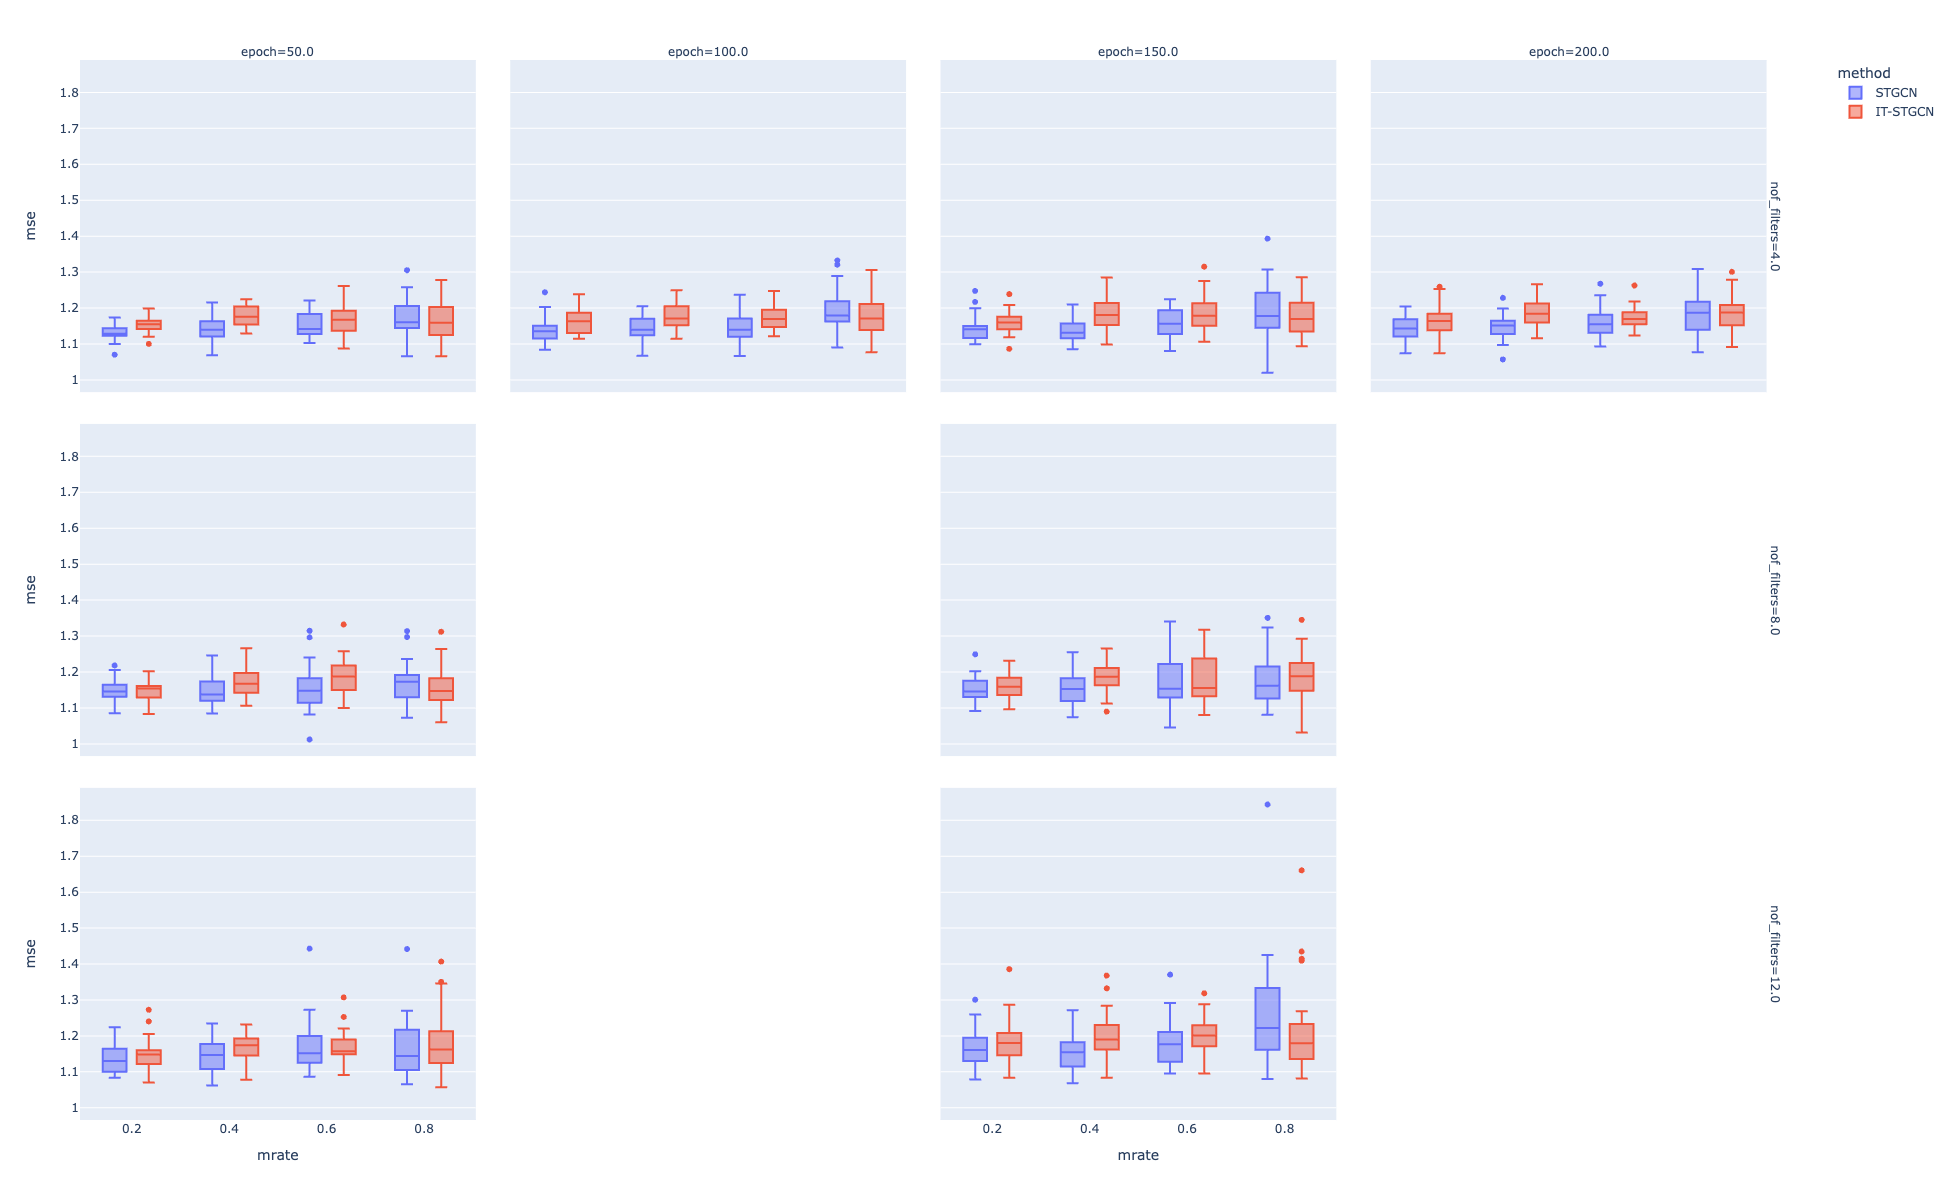

In [206]:
data.query("method!='GNAR' and inter_method=='linear' and lags==2").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='epoch',facet_row='nof_filters',height=1200)


#### 시뮬 예정(평균 시간, 평균mse)

0.7,0.75,0.8,0.85

12,16

150

In [242]:
# 1. mrate = 0.8, filter = 12, epoch = 150
data.query("mrate==0.8 and inter_method=='linear' and nof_filters==12 and epoch==150 and lags==2")['calculation_time'].mean(),data.query("mrate==0.8 and inter_method=='linear' and nof_filters==12 and epoch==150 and lags==2")['mse'].mean()

(109.59549897114435, 1.2304790377616883)

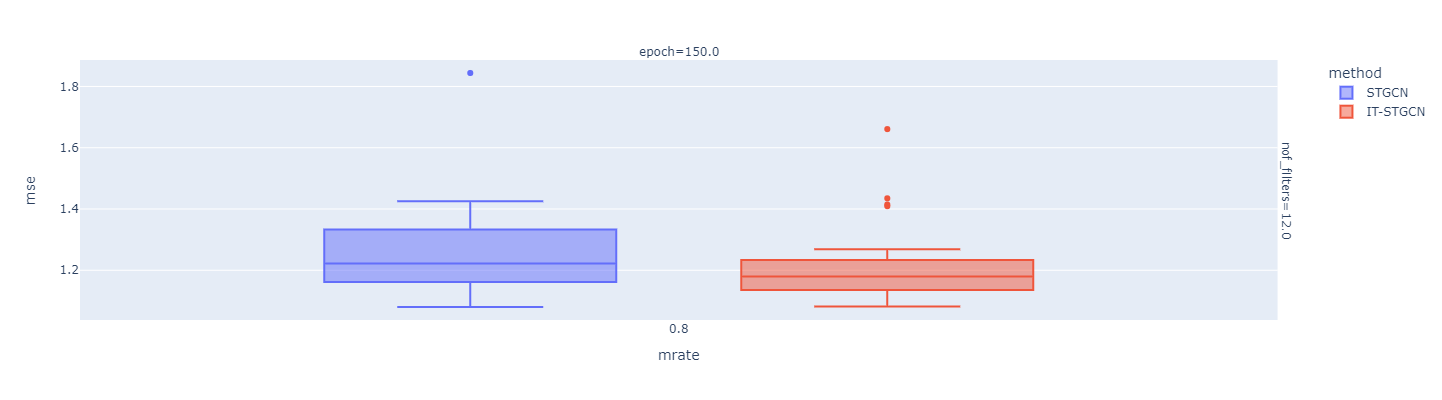

In [290]:
data.query("mrate==0.8 and inter_method=='linear' and nof_filters==12 and epoch==150 and lags==2").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='epoch',facet_row='nof_filters',height=400)

## block

In [292]:
df1 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_block_node1_epoch50.csv')
df2 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_block_node1_epoch100.csv')
df3 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_block_node1_epoch150.csv')
df4 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_block_node1_epoch200.csv')
df5 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_block_node2_epoch50.csv')
df6 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_block_node2_epoch100.csv')
df7 = pd.read_csv('./simulation_results/fivenodes/fivenodes_STGCN_ITSTGCN_block_node2_epoch150.csv')
df8 = pd.read_csv('./simulation_results/fivenodes/fivenodes_GNAR_block_node1.csv')
df9 = pd.read_csv('./simulation_results/fivenodes/fivenodes_GNAR_block_node2.csv')

In [293]:
df1['block']=1
df2['block']=1
df3['block']=1
df4['block']=1
df5['block']=2
df6['block']=2
df7['block']=2
df8['block']=1
df9['block']=2

In [294]:
data2 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9],axis=0)

In [296]:
data2.query("method=='GNAR' and block == 1")['mse'].mean(),data2.query("method=='GNAR' and block == 2")['mse'].mean()

(1.455923080444336, 1.5004450678825378)

In [297]:
data2.query("method=='GNAR' and inter_method == 'linear'")['mse'].mean(),data2.query("method=='GNAR' and inter_method == 'nearest'")['mse'].mean() # 차이 없음

(1.4813642161233085, 1.4813642161233085)

In [298]:
data2.query("epoch==50")['calculation_time'].mean(),data2.query("epoch==50")['calculation_time'].max()

(39.11611335332747, 56.8712797164917)

In [299]:
data2.query("epoch==150")['calculation_time'].mean(),data2.query("epoch==150")['calculation_time'].max()

(102.26520284502594, 152.8869686126709)

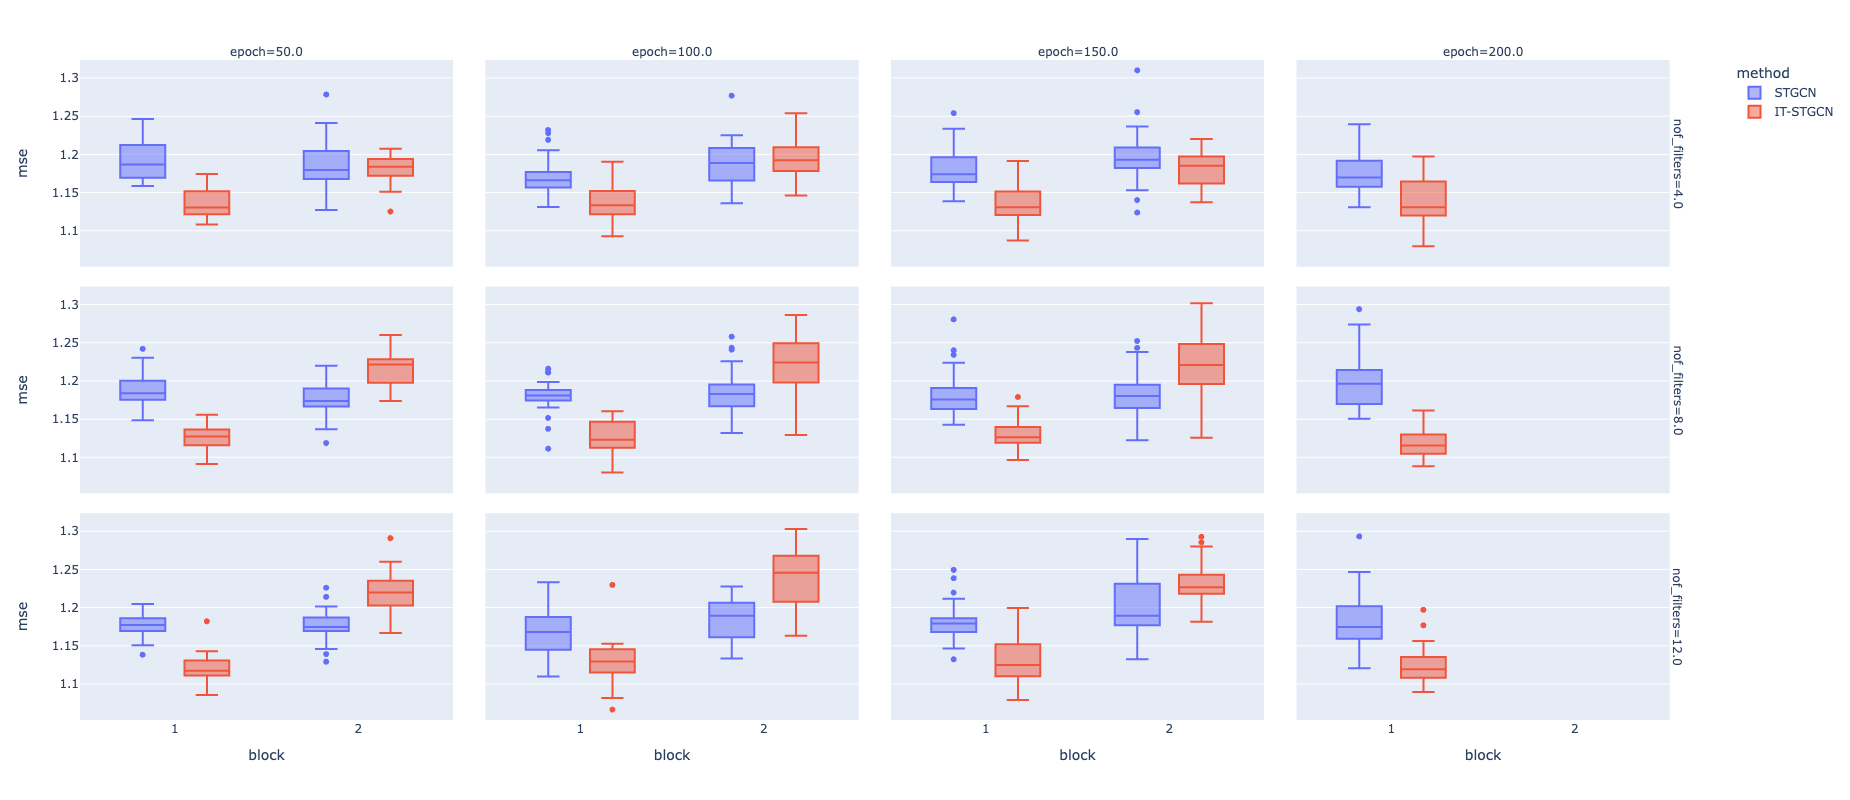

In [300]:
data2.query("method!='GNAR' and lags == 2 and inter_method=='nearest'").plot.box(backend='plotly',x='block',color='method',y='mse',facet_col='epoch',facet_row='nof_filters',height=800)


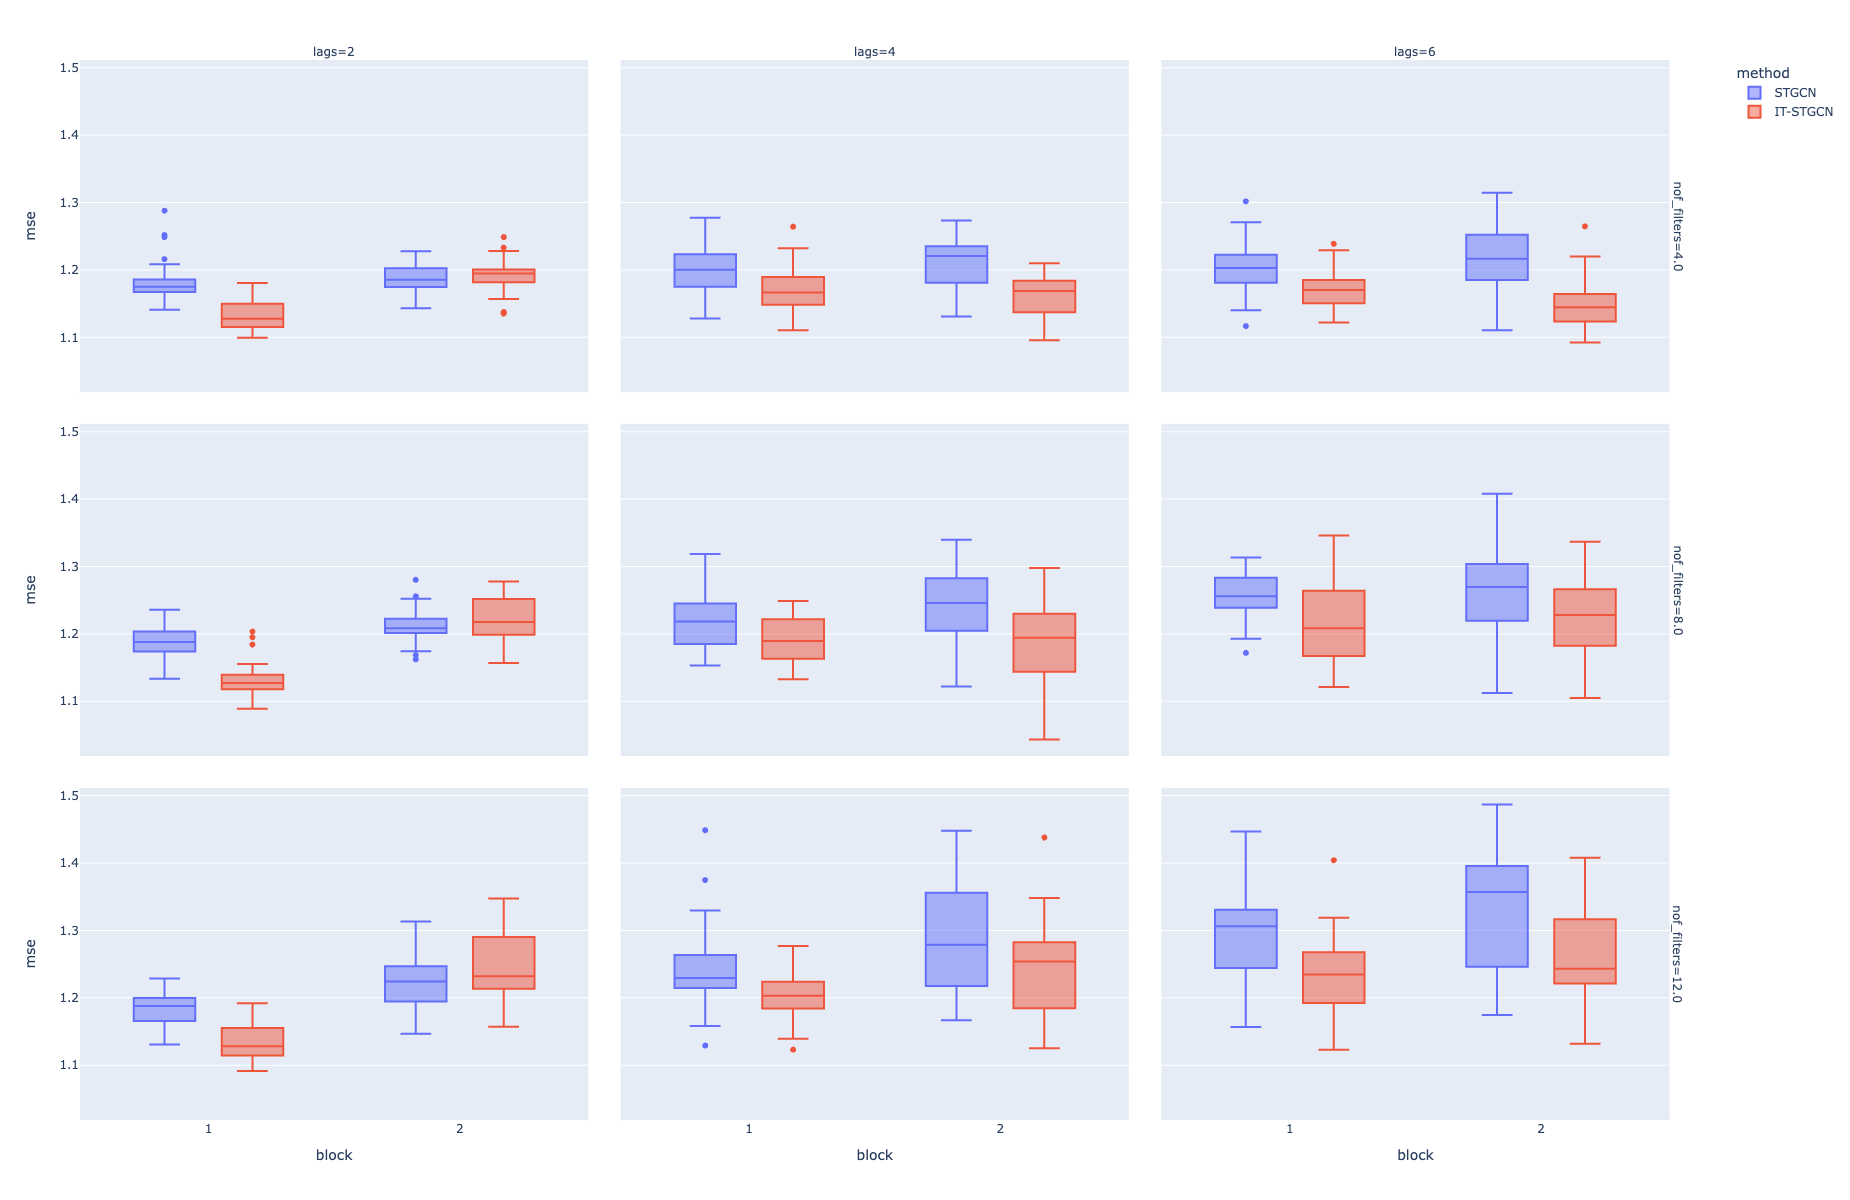

In [301]:
data2.query("inter_method=='linear' and epoch==150").plot.box(backend='plotly',x='block',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


#### 시뮬 예정(평균 시간, 평균mse)

block 1,2 위 세팅 그대로

랜덤ㅁ 말고 block만

In [306]:
# 1. block = 2 interpolation = linear, filter = 12, epoch = 150
data2.query("block==1 and inter_method=='linear' and nof_filters==12 and epoch==50 and lags==2")['calculation_time'].mean(),data2.query("block==2 and inter_method=='linear' and nof_filters==12 and epoch==50 and lags==2")['mse'].mean()

(40.18422634204229, 1.2096982955932618)

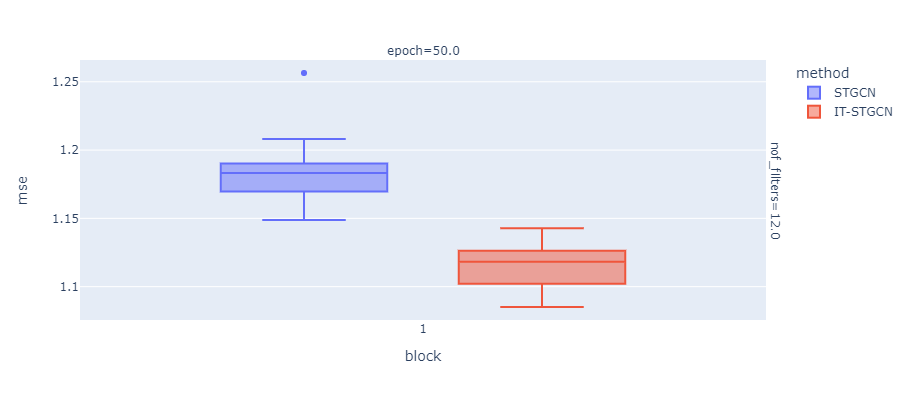

In [307]:
data2.query("block==1 and inter_method=='linear' and nof_filters==12 and epoch==50 and lags==2").plot.box(backend='plotly',x='block',color='method',y='mse',facet_col='epoch',facet_row='nof_filters',height=400)

# fivenodes simulation result

```python
mindex= [[],[],[],list(range(50,150)),[]] # block 1
mindex= [list(range(10,100)),[],list(range(50,80)),[],[]] # node 2 30% mmissing
```
block 조건

In [135]:
df1 = pd.read_csv('./simulation_results/2023-04-09_23-37-17.csv') # GNAR random
df2 = pd.read_csv('./simulation_results/2023-04-10_07-06-32.csv') # STGCN, ITSTGCN random 70%, 75%
df3 = pd.read_csv('./simulation_results/2023-04-10_14-54-51.csv') # STGCN, ITSTGCN random 80%, 85%
df4 = pd.read_csv('./simulation_results/2023-04-10_15-54-03.csv') # GNAR block 1
df5 = pd.read_csv('./simulation_results/2023-04-10_15-56-27.csv') # GNAR block 2
df6 = pd.read_csv('./simulation_results/2023-04-10_23-44-52.csv') # STGCN, ITSTGCN block 1
df7 = pd.read_csv('./simulation_results/2023-04-11_04-40-00.csv') # STGCN, ITSTGCN block 2
df8 = pd.read_csv('./simulation_results/2023-04-14_21-21-34.csv') # S/TGCN, ITSTGCN missing 0

In [136]:
data = pd.concat([df1,df2, df3, df4,df5,df6,df7,df8],axis=0);data

dataset    method  mrate mtype  lags  nof_filters inter_method  epoch  \
0    five_nodes      GNAR   0.70  rand     2          NaN       linear    NaN   
1    five_nodes      GNAR   0.75  rand     2          NaN       linear    NaN   
2    five_nodes      GNAR   0.80  rand     2          NaN       linear    NaN   
3    five_nodes      GNAR   0.85  rand     2          NaN       linear    NaN   
4    five_nodes      GNAR   0.70  rand     2          NaN       linear    NaN   
..          ...       ...    ...   ...   ...          ...          ...    ...   
235   fivenodes     STGCN   0.00   NaN     2         16.0          NaN  150.0   
236   fivenodes  IT-STGCN   0.00   NaN     2         12.0          NaN  150.0   
237   fivenodes  IT-STGCN   0.00   NaN     2         12.0          NaN  150.0   
238   fivenodes  IT-STGCN   0.00   NaN     2         16.0          NaN  150.0   
239   fivenodes  IT-STGCN   0.00   NaN     2         16.0          NaN  150.0   

          mse  calculation_time  
0    1.406830          0.022885  
1    1.406830          0.005927  
2    1.406830          0.005557  
3    1.406830          0.010217  
4    1.406830          0.006891  
..        ...               ...  
235  1.162979        117.819705  
236  1.156077        122.355274  
237  1.162236        122.169977  
238  1.145952        123.042743  
239  1.158429        124.601893  

[1212 rows x 10 columns]

In [137]:
data.to_csv('./simulation_results/Real_simulation/fivedones_Simulation.csv',index=False)

In [138]:
data = pd.read_csv('./simulation_results/Real_simulation/fivedones_Simulation.csv')

In [139]:
data.query("method=='GNAR' and mtype == 'rand'")['mse'].mean(),data.query("method=='GNAR' and mtype != 'rand'")['mse'].mean()

(1.4068299531936646, 1.4068299531936646)

In [140]:
data.query("method=='STGCN' and mtype == 'rand'")['mse'].mean(),data.query("method=='STGCN' and mtype != 'rand'")['mse'].mean()

(1.256219128270944, 3.429857851266861)

In [141]:
data.query("method=='IT-STGCN' and mtype == 'rand'")['mse'].mean(),data.query("method=='IT-STGCN' and mtype != 'rand'")['mse'].mean()

(1.223042539258798, 2.4890875375270842)

Baseline

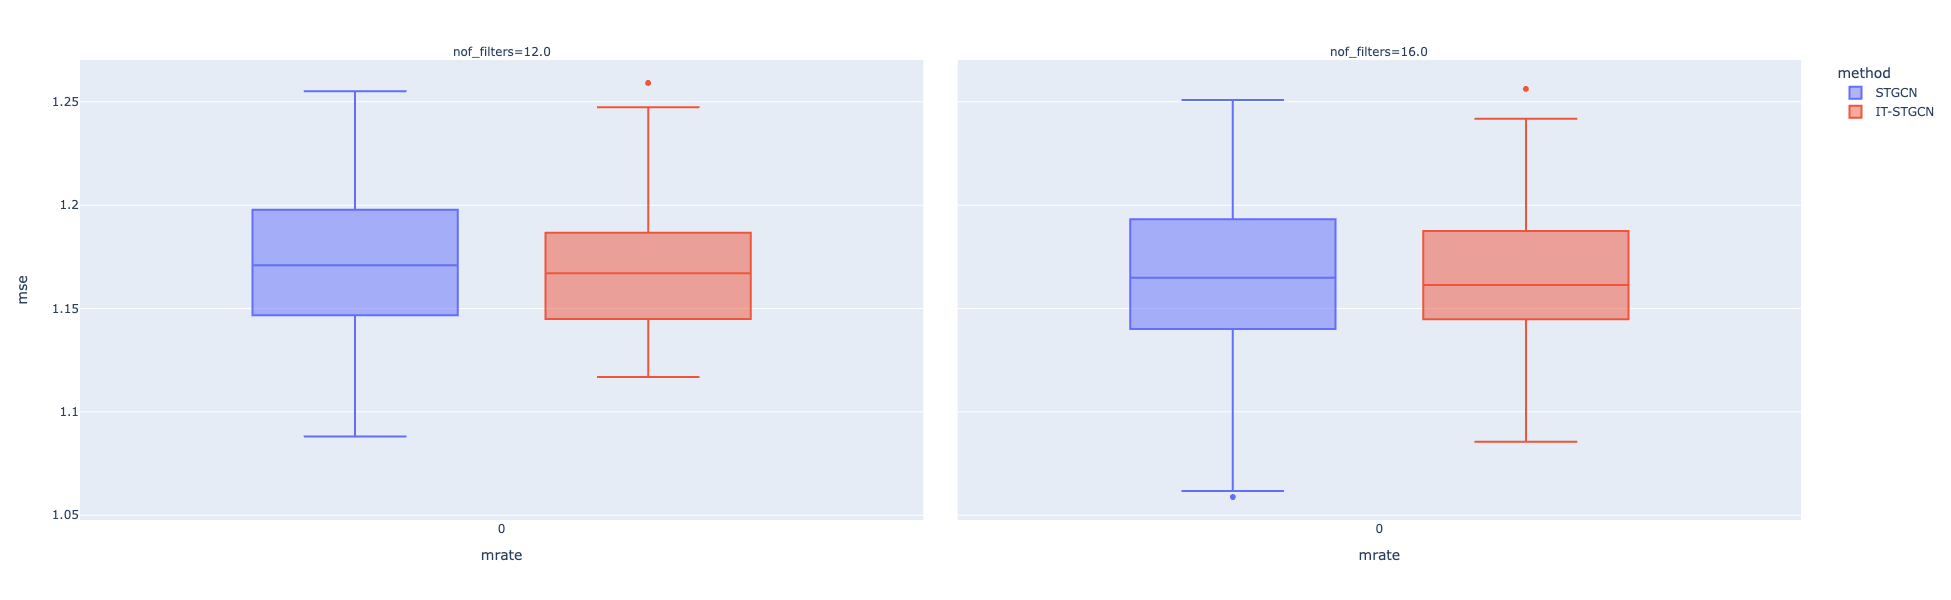

In [142]:
data.query("method!='GNAR' and mrate==0").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='nof_filters',height=600)


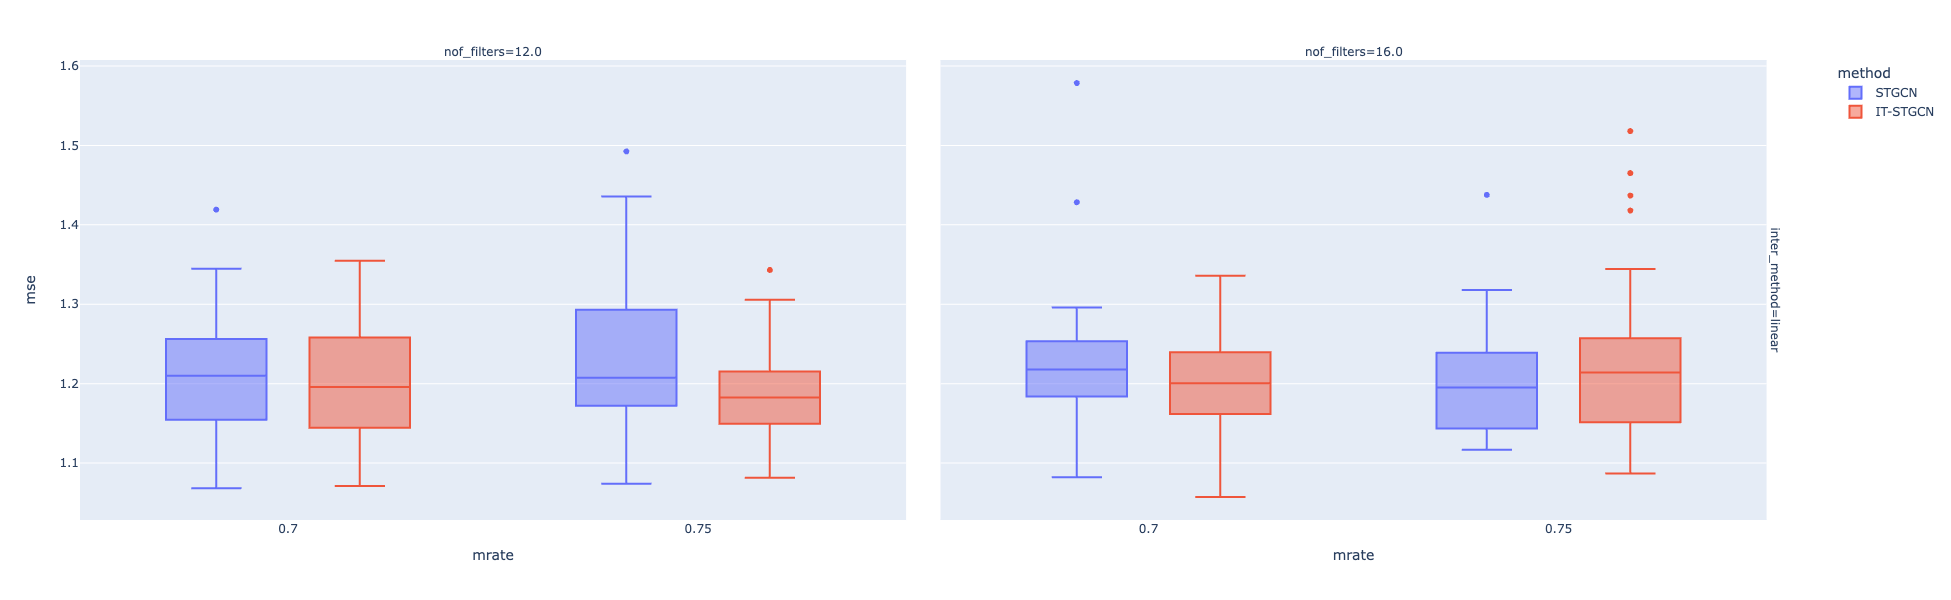

In [144]:
data.query("method!='GNAR' and mtype =='rand' and (mrate==0.7 or mrate==0.75)").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='nof_filters',facet_row='inter_method',height=600)


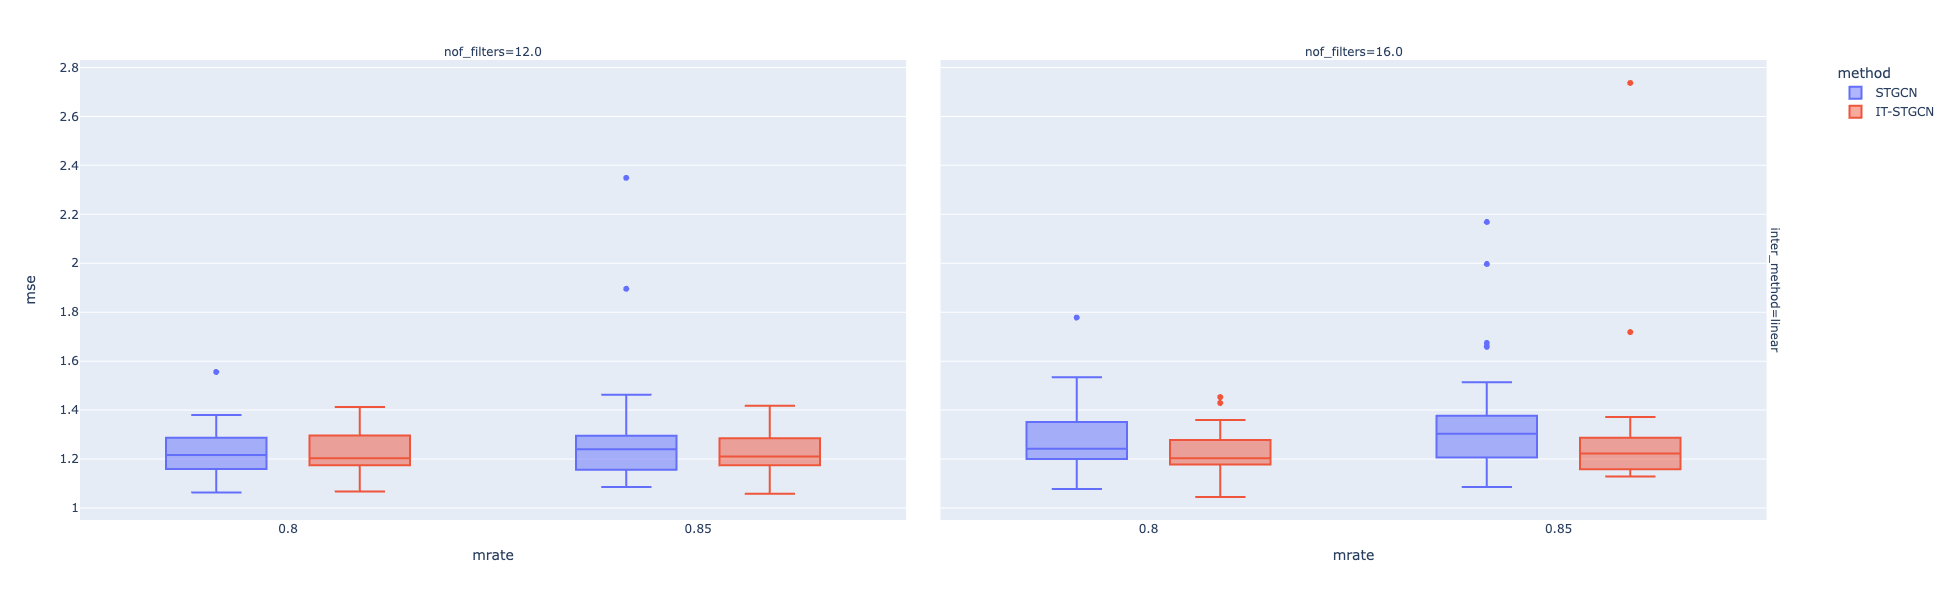

In [145]:
data.query("method!='GNAR' and mtype =='rand'  and (mrate==0.8 or mrate==0.85)").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='nof_filters',facet_row='inter_method',height=600)


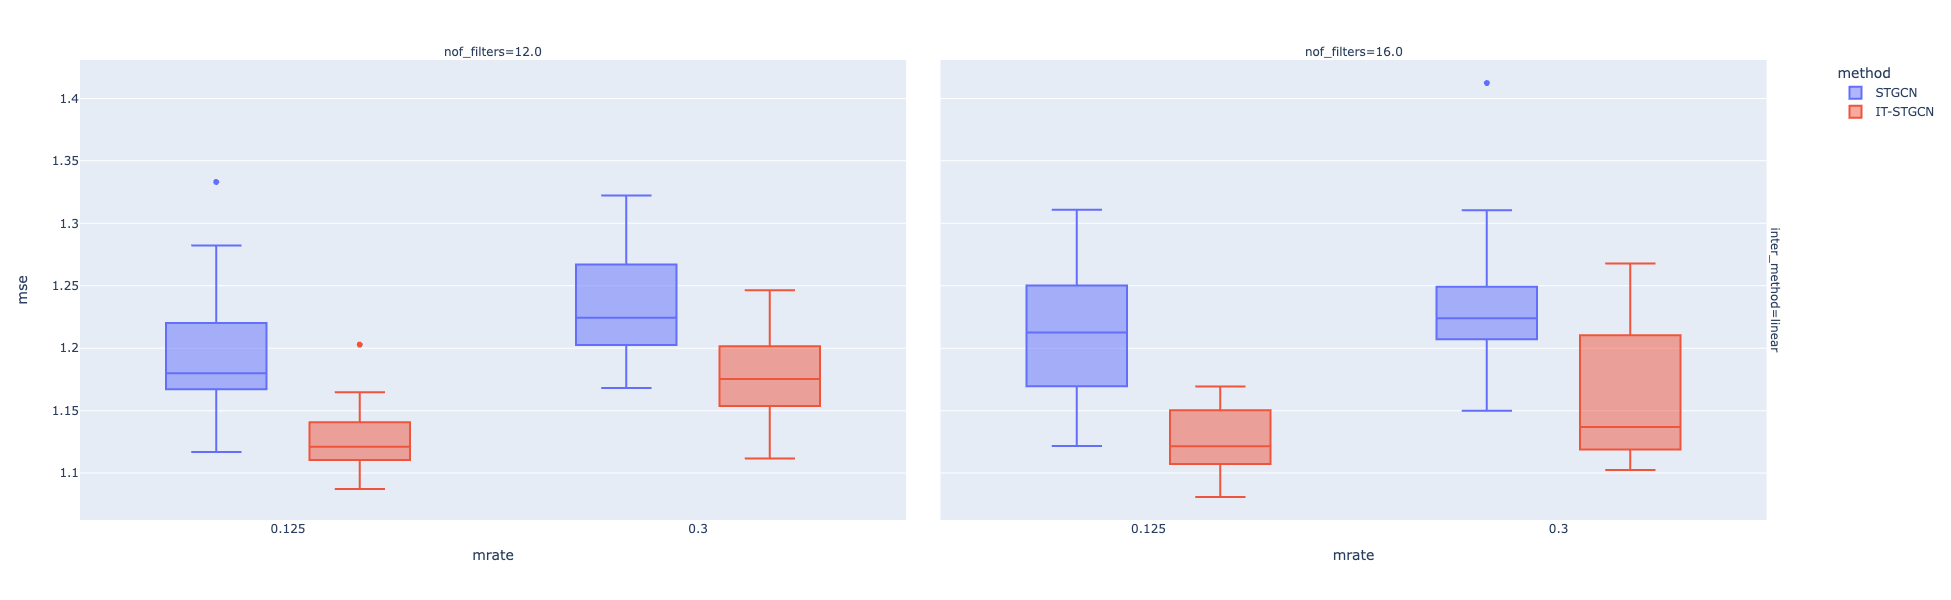

In [28]:
data.query("method!='GNAR' and mtype =='block' and inter_method=='linear' ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='nof_filters',facet_row='inter_method',height=600)


# chickenpox

## random

- 공식 패키지: lags 4 지정
- mrate = 0.3 
    - 결측값 비율 크니까 오차 많이 커지는 경향 있어서
- nof_filters = 4
    - 차이 없어서
- lags = 4, 8
    - 클 수록 작아지는 경향 있어서
- GNAR보다 MSE는 낮음
- cal_time
    - mean = 10
    - max = 21
- block 은 임의로 한 노드만 해 본 결과임

In [6]:
data = pd.read_csv('./simulation_results/chickenpox_random.csv').sort_values(by='lags')

In [8]:
data.query("method!='GNAR'")['calculation_time'].mean(),data.query("method!='GNAR'")['calculation_time'].max(),data.query("method!='GNAR'")['calculation_time'].min()

(10.42619569649299, 21.886654376983643, 7.567165851593018)

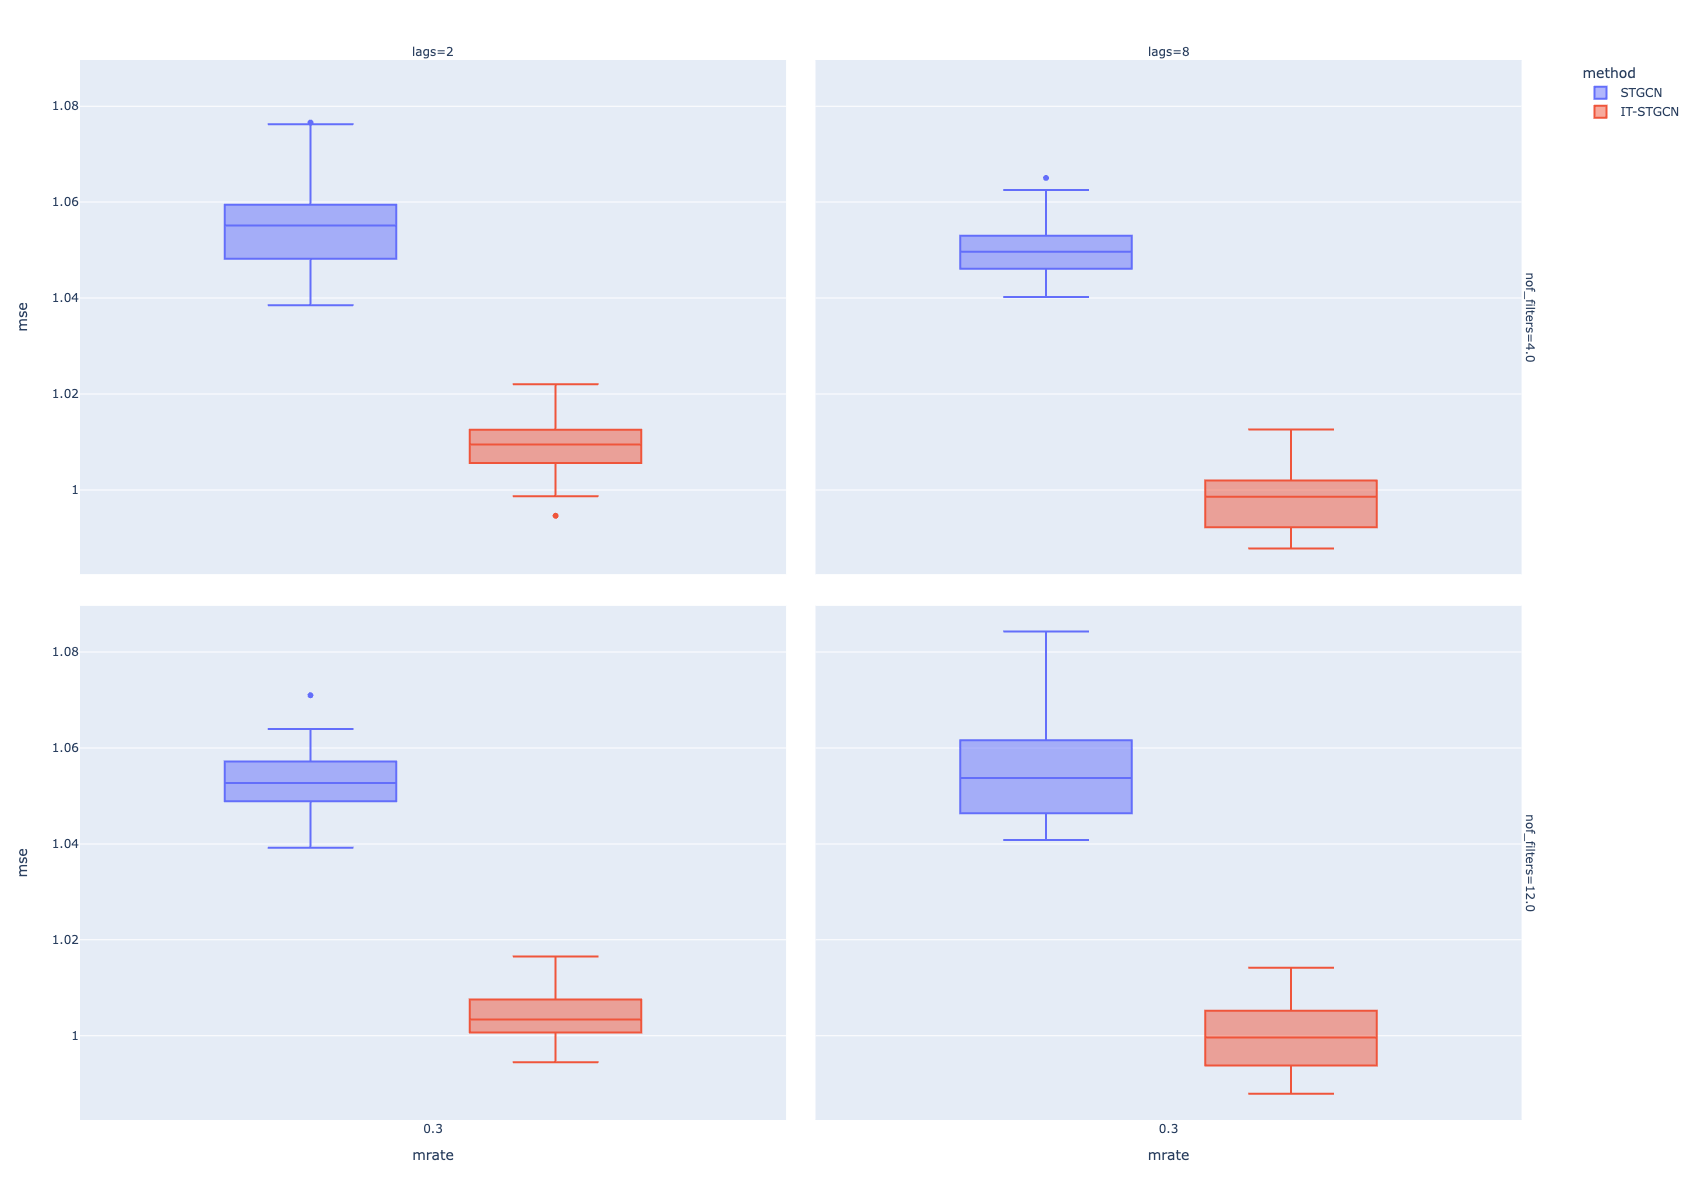

In [12]:
data.query("method!='GNAR' and inter_method=='cubic' and mrate==0.3").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


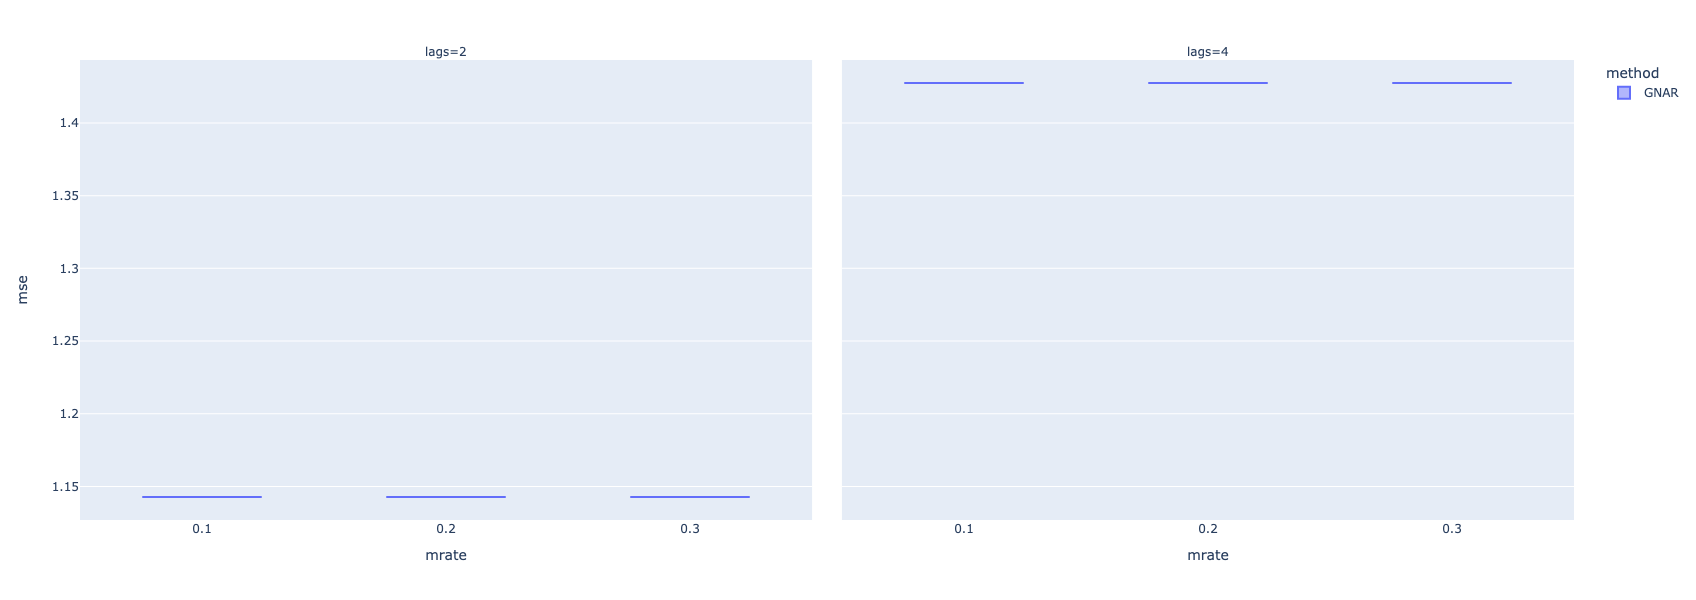

In [10]:
data.query("method=='GNAR' and inter_method=='linear'").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',height=600)


#### 시뮬 예정(평균 시간, 평균mse)

epoch = 50

mrate = 0.3~0.5

filter 32 공식예제로 가기 하고 샆으면 3개 정도 추가로

In [469]:
# 1. mrate = 0.3, filter = 4, epoch = 50, lags = 4
data.query("method !='GNAR' and mrate==0.3 and inter_method=='cubic' and nof_filters==4 and lags==2")['calculation_time'].mean(),data.query("method != 'GNAR' and mrate==0.3 and inter_method=='cubic' and nof_filters==4 and lags==2")['mse'].mean()

(10.115000387032827, 1.0320488701264063)

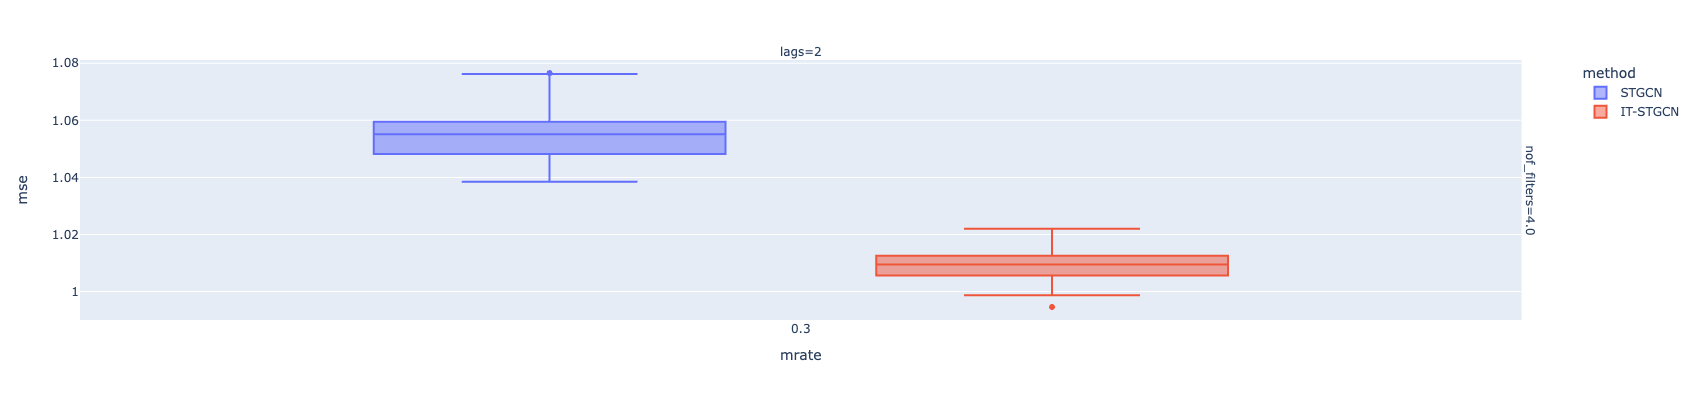

In [470]:
data.query("method !='GNAR' and mrate==0.3 and inter_method=='cubic' and nof_filters==4 and lags==2").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=400)


## block

In [15]:
data = pd.read_csv('./simulation_results/chickenpox_block.csv')

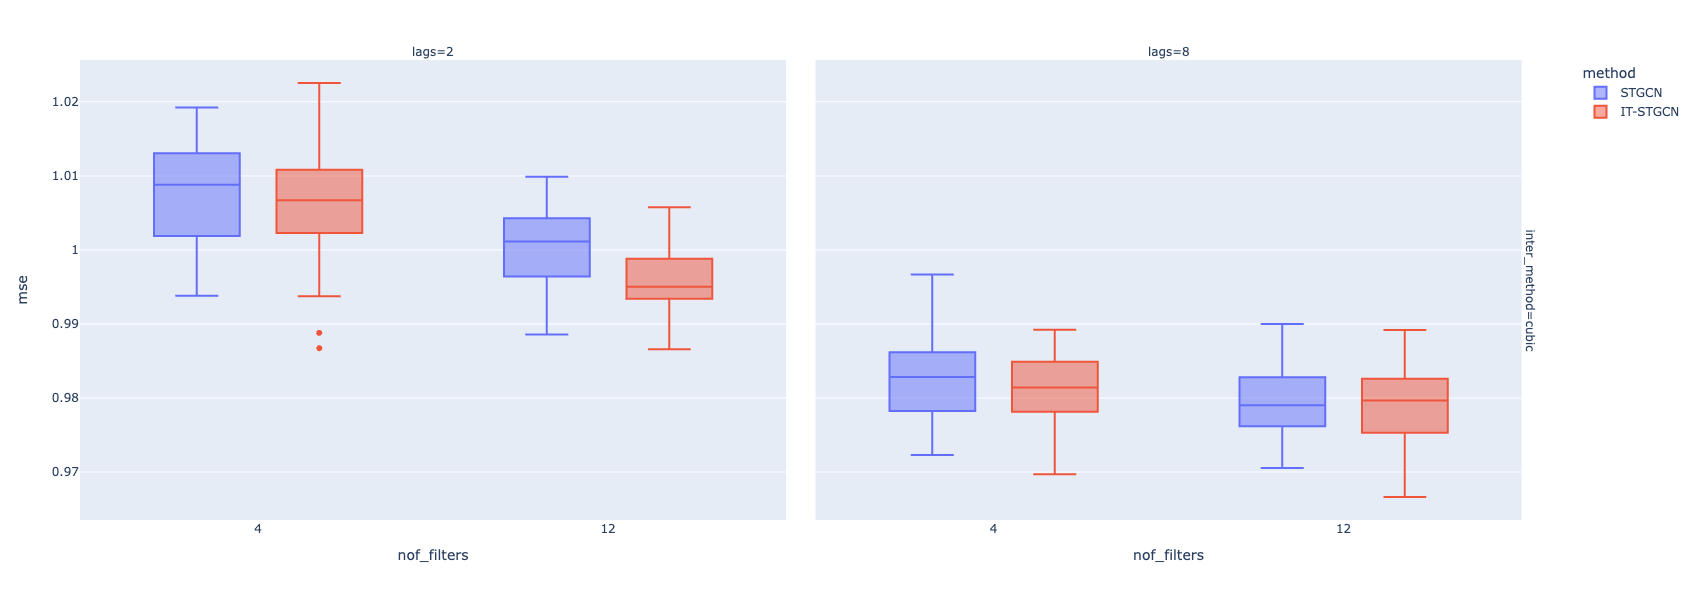

In [21]:
data.query("method != 'GNAR' and lags!=4 and lags!=6 and inter_method !='linear'").plot.box(backend='plotly',x='nof_filters',color='method',y='mse',facet_col='lags',facet_row='inter_method',height=600)


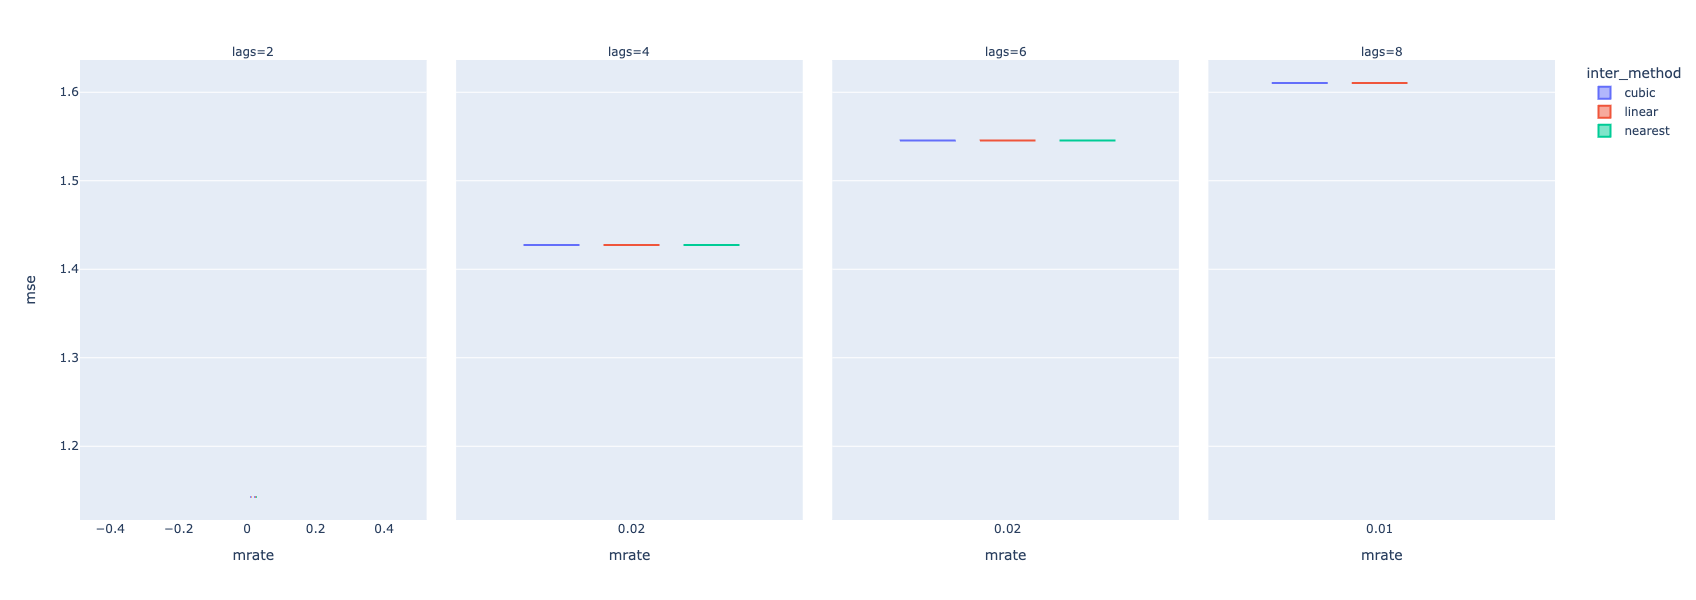

In [473]:
data.query("method=='GNAR'").plot.box(backend='plotly',x='mrate',color='inter_method',y='mse',facet_col='lags',height=600)


#### 시뮬 예정(평균 시간, 평균mse)

block, rand 다

공식예제 수 따라

epoch 50

나중에 시간 남으면 100

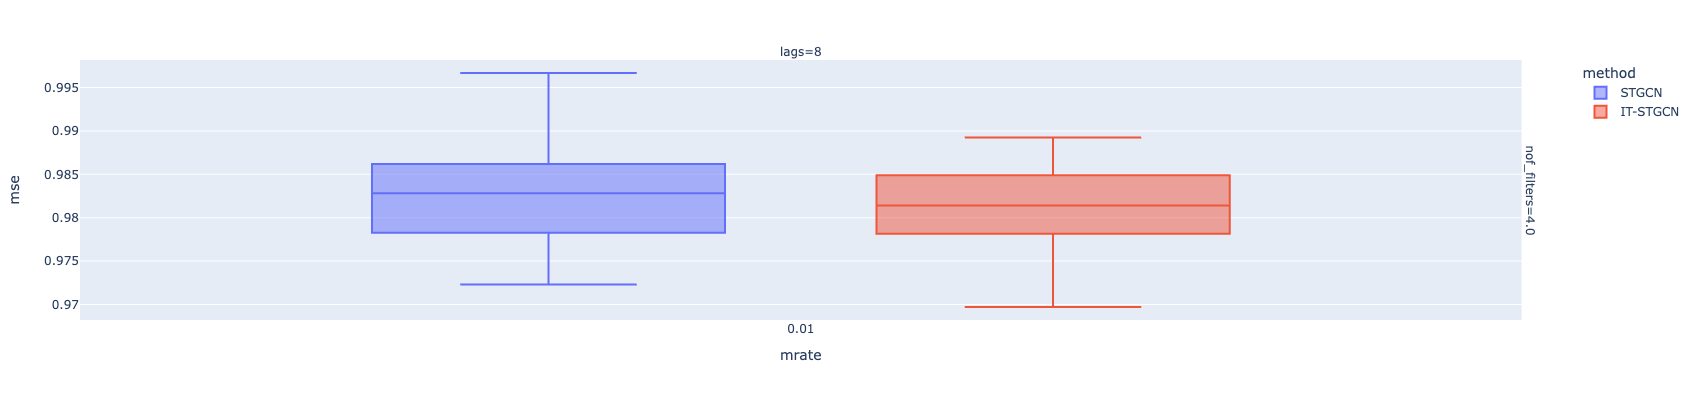

In [486]:
data.query("inter_method=='cubic' and nof_filters==4 and lags==8").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=400)


# chikenpox simulation result

```python
my_list = [[] for _ in range(20)] #chickenpox
another_list = list(range(100,400))
my_list[1] = another_list
my_list[3] = another_list
my_list[5] = another_list
my_list[7] = another_list
my_list[9] = another_list
my_list[11] = another_list
my_list[13] = another_list
my_list[15] = another_list
mindex = my_list
```
block 30% missing을 위한 조건

In [146]:
df1 = pd.read_csv('./simulation_results/2023-04-11_06-56-35.csv') # GNAR random
df2 = pd.read_csv('./simulation_results/2023-04-11_07-01-42.csv') # GNAR block
df3 = pd.read_csv('./simulation_results/2023-04-11_18-20-22.csv') # STGCN, ITSTGCN random 30%
df4 = pd.read_csv('./simulation_results/2023-04-12_05-44-19.csv') # STGCN, ITSTGCN random 40%
df5 = pd.read_csv('./simulation_results/2023-04-12_17-03-28.csv') # STGCN, ITSTGCN random 50%
df6 = pd.read_csv('./simulation_results/2023-04-13_18-59-17.csv') # STGCN, ITSTGCN block cubic
df7 = pd.read_csv('./simulation_results/2023-04-14_00-57-11.csv') # STGCN, ITSTGCN block linear
df8 = pd.read_csv('./simulation_results/2023-04-14_12-55-58.csv') # STGCN, ITSTGCN 0% missing

In [147]:
data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],axis=0);data

dataset    method  mrate mtype  lags  nof_filters inter_method  epoch  \
0    chickenpox      GNAR    0.3  rand     4          NaN       linear    NaN   
1    chickenpox      GNAR    0.3  rand     4          NaN        cubic    NaN   
2    chickenpox      GNAR    0.4  rand     4          NaN       linear    NaN   
3    chickenpox      GNAR    0.4  rand     4          NaN        cubic    NaN   
4    chickenpox      GNAR    0.5  rand     4          NaN       linear    NaN   
..          ...       ...    ...   ...   ...          ...          ...    ...   
355  chickenpox  IT-STGCN    0.0   NaN     4         16.0          NaN   50.0   
356  chickenpox  IT-STGCN    0.0   NaN     4         24.0          NaN   50.0   
357  chickenpox  IT-STGCN    0.0   NaN     4         24.0          NaN   50.0   
358  chickenpox  IT-STGCN    0.0   NaN     4         32.0          NaN   50.0   
359  chickenpox  IT-STGCN    0.0   NaN     4         32.0          NaN   50.0   

          mse  calculation_time  
0    1.427494          0.070639  
1    1.427494          0.072070  
2    1.427494          0.087900  
3    1.427494          0.094206  
4    1.427494          0.096730  
..        ...               ...  
355  1.014494        116.511157  
356  1.001220        117.726670  
357  1.002661        117.931265  
358  1.017814        123.757436  
359  1.014889        124.369595  

[1986 rows x 10 columns]

In [148]:
data.to_csv('./simulation_results/Real_simulation/chikenpox_Simulation.csv',index=False)

In [149]:
data = pd.read_csv('./simulation_results/Real_simulation/chikenpox_Simulation.csv')

In [150]:
data.query("method=='GNAR' and mtype == 'rand'")['mse'].mean(),data.query("method=='GNAR' and mtype != 'rand'")['mse'].mean()

(1.4274942874908447, 1.4274942874908447)

In [151]:
data.query("method=='STGCN' and mtype == 'rand'")['mse'].mean(),data.query("method=='STGCN' and mtype != 'rand'")['mse'].mean()

(1.0746942153683414, 1.0201175289021598)

In [152]:
data.query("method=='IT-STGCN' and mtype == 'rand'")['mse'].mean(),data.query("method=='IT-STGCN' and mtype != 'rand'")['mse'].mean()

(1.0245469553603066, 1.0210112863116794)

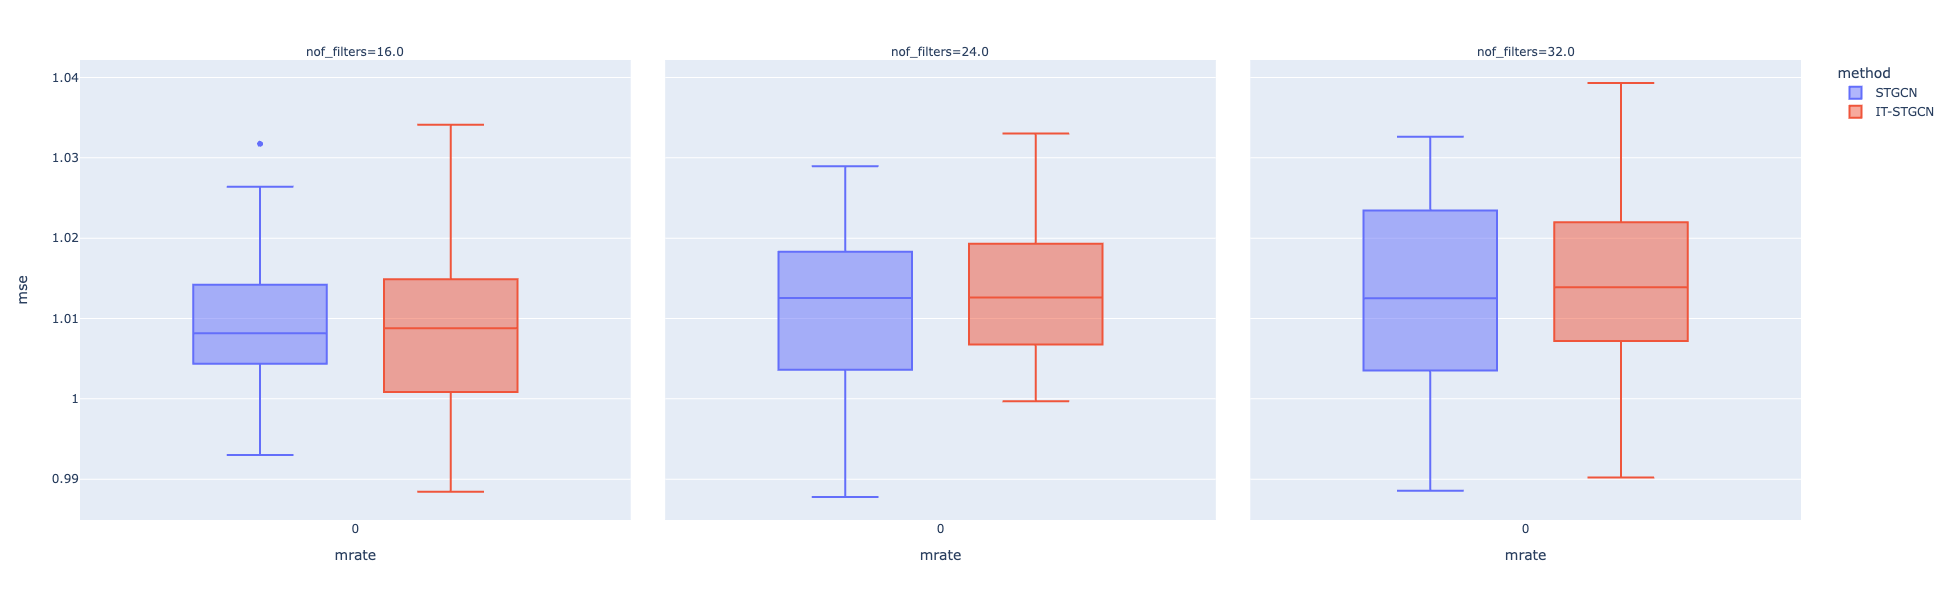

In [157]:
data.query("method!='GNAR' and mrate ==0 ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='nof_filters',height=600)


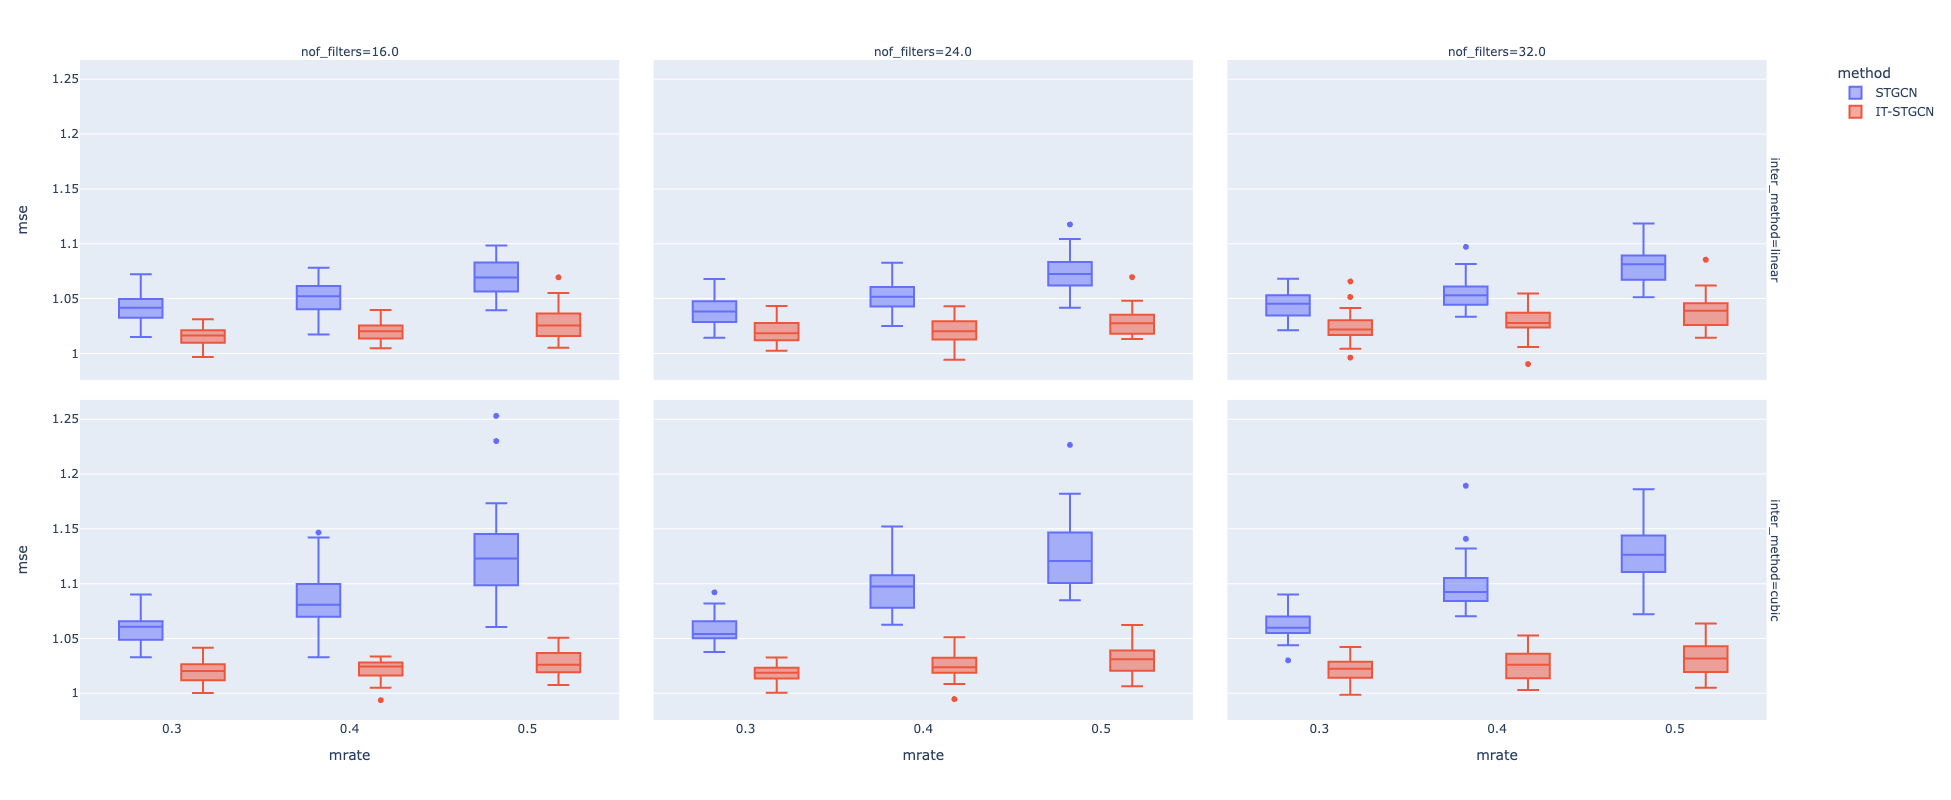

In [153]:
data.query("method!='GNAR' and mtype =='rand' ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='nof_filters',facet_row='inter_method',height=800)


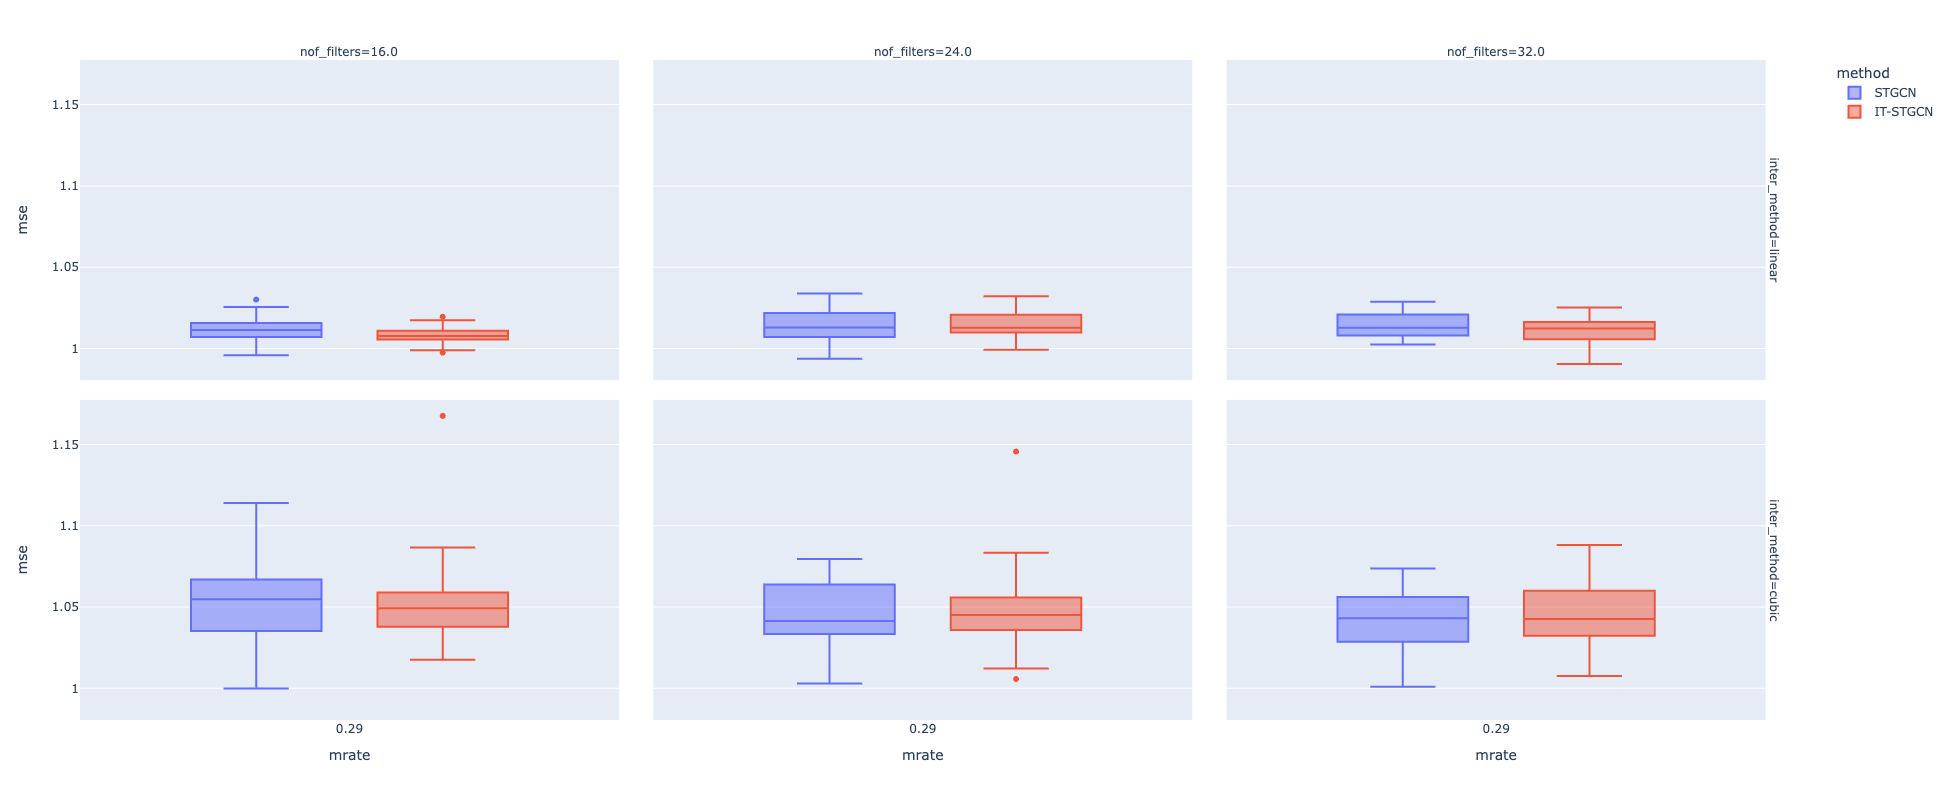

In [98]:
data.query("method!='GNAR' and mtype =='block' ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='nof_filters',facet_row='inter_method',height=800)


# Pedalme

데이터셋 미싱이 0.8일때

`The number of derivatives at boundaries does not match: expected 1, got 0+0`

해당 오류, 즉 미분되지 않는 오류가 생긴다.

- 공식 패키지: lags 4 지정
- mrate = 0.3
- nof_filters = 12
    - 필터 클수록 mse 안정적으로 보임!
- lags = 4, 8
    - lags 클 수록 커지는 경향이 있지만,
    - lags 크니까 GNAR보다 mse 평균적으로 낮게 보인다.
- GNAR보다 MSE는 낮음
- cal_time
    - mean = 1초도 안 된다!
    - max = 6초!

# random

In [22]:
data = pd.read_csv('./simulation_results/pedalme_random.csv');data

dataset    method  mrate mtype  lags  nof_filters inter_method  epoch  \
0     pedalme      GNAR    0.0   NaN     2          NaN          NaN    NaN   
1     pedalme  IT-STGCN    0.0   NaN     2          4.0          NaN    5.0   
2     pedalme  IT-STGCN    0.0   NaN     2          4.0          NaN    5.0   
3     pedalme  IT-STGCN    0.0   NaN     2         12.0          NaN    5.0   
4     pedalme  IT-STGCN    0.0   NaN     2         12.0          NaN    5.0   
...       ...       ...    ...   ...   ...          ...          ...    ...   
2527  pedalme     STGCN    0.3  rand     8          4.0       linear    5.0   
2528  pedalme     STGCN    0.3  rand     8          4.0        cubic    5.0   
2529  pedalme  IT-STGCN    0.7  rand     8         12.0       linear    5.0   
2530  pedalme  IT-STGCN    0.3  rand     8          4.0        cubic    5.0   
2531  pedalme      GNAR    0.7  rand     8          NaN       linear    NaN   

           mse  calculation_time  
0     1.151634          0.009696  
1     1.255845          1.595633  
2     1.216815          1.721916  
3     1.249243          1.420279  
4     1.237032          0.910204  
...        ...               ...  
2527  1.429247          0.560238  
2528  1.431005          0.564748  
2529  1.489404          0.543194  
2530  1.372652          0.628229  
2531  1.382030          0.020379  

[2532 rows x 10 columns]

In [23]:
data.query("method!='GNAR'")['calculation_time'].mean(),data.query("method!='GNAR'")['calculation_time'].max(),data.query("method!='GNAR'")['calculation_time'].min()

(0.9260026927347537, 6.205296277999878, 0.4241352081298828)

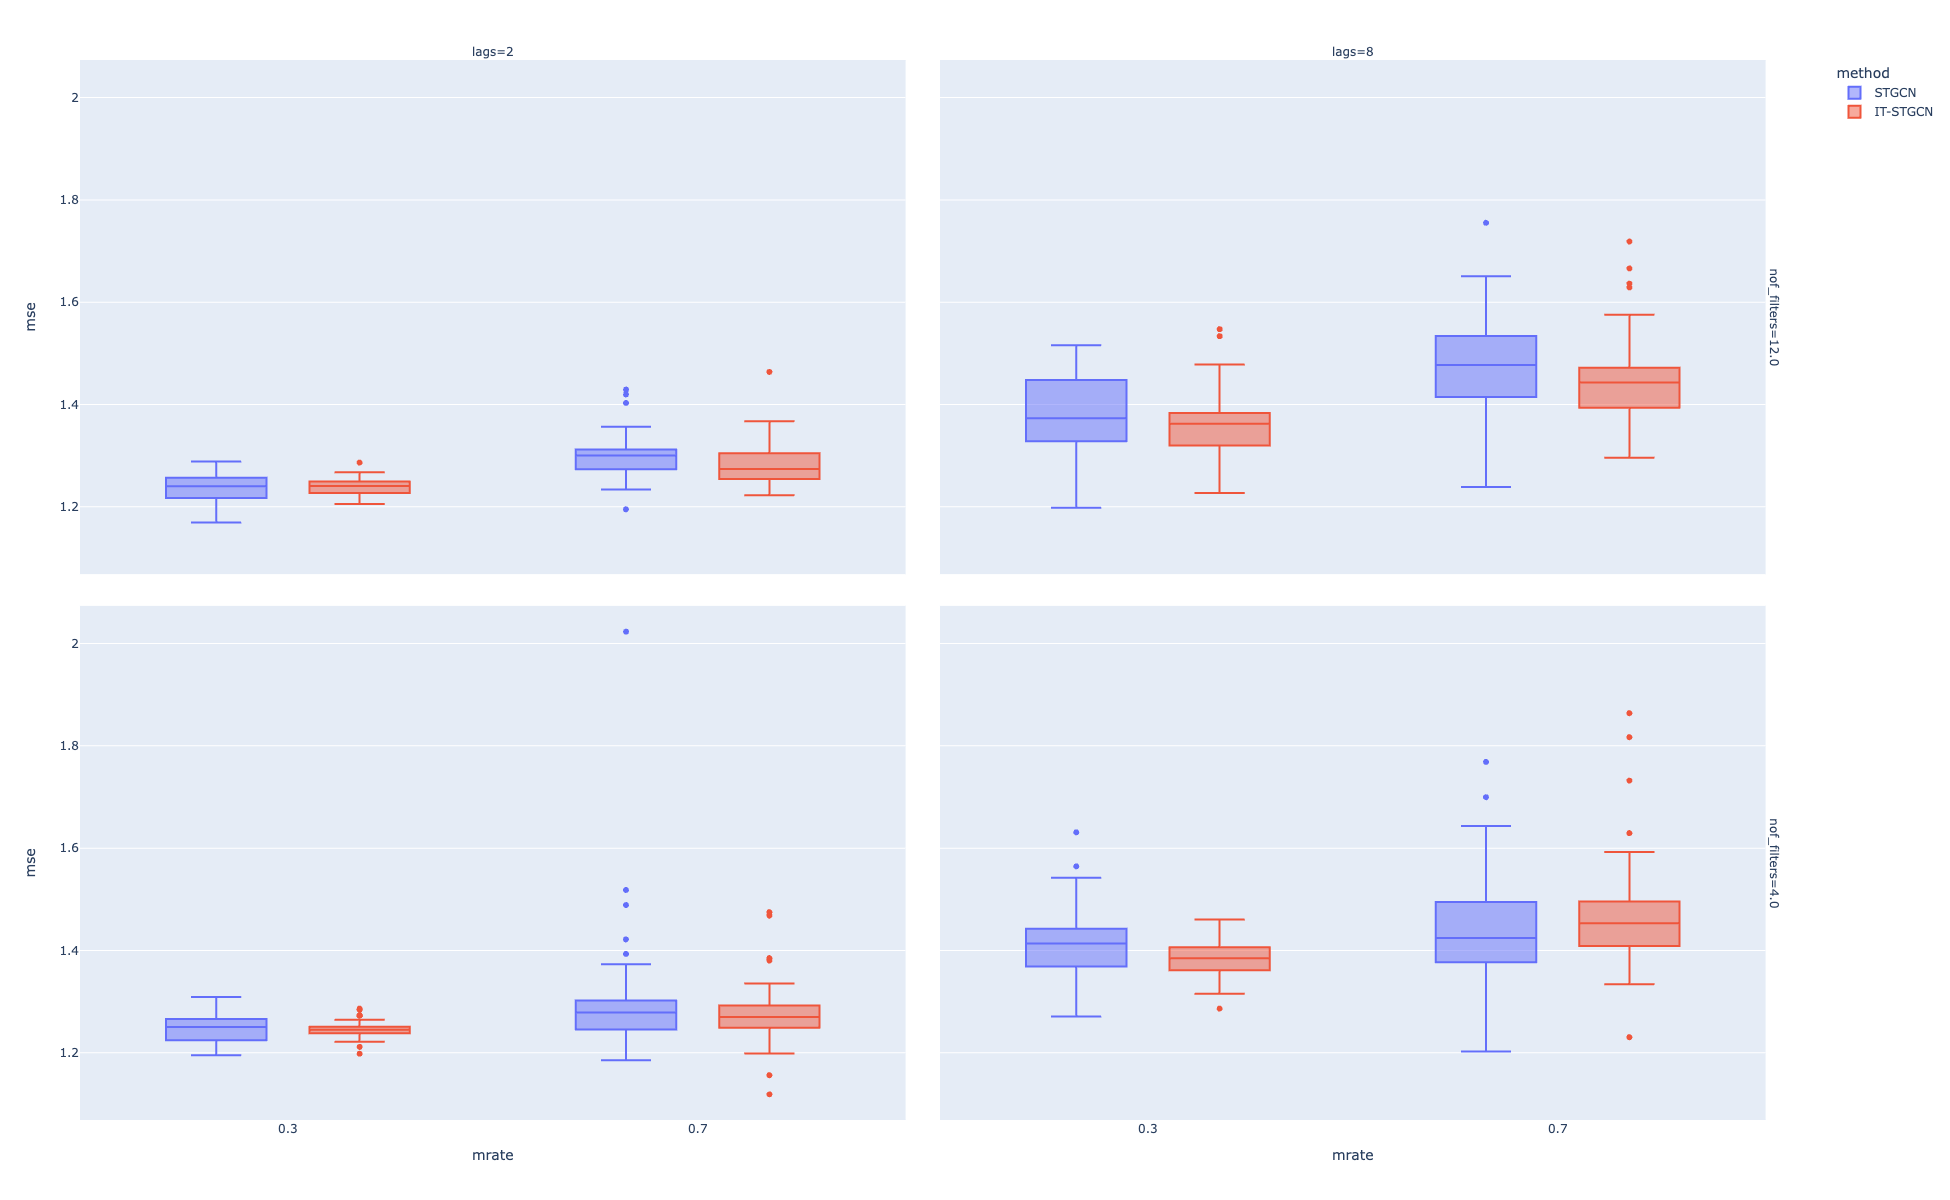

In [30]:
data.query("mtype=='rand' and method!='GNAR' and lags!=4").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


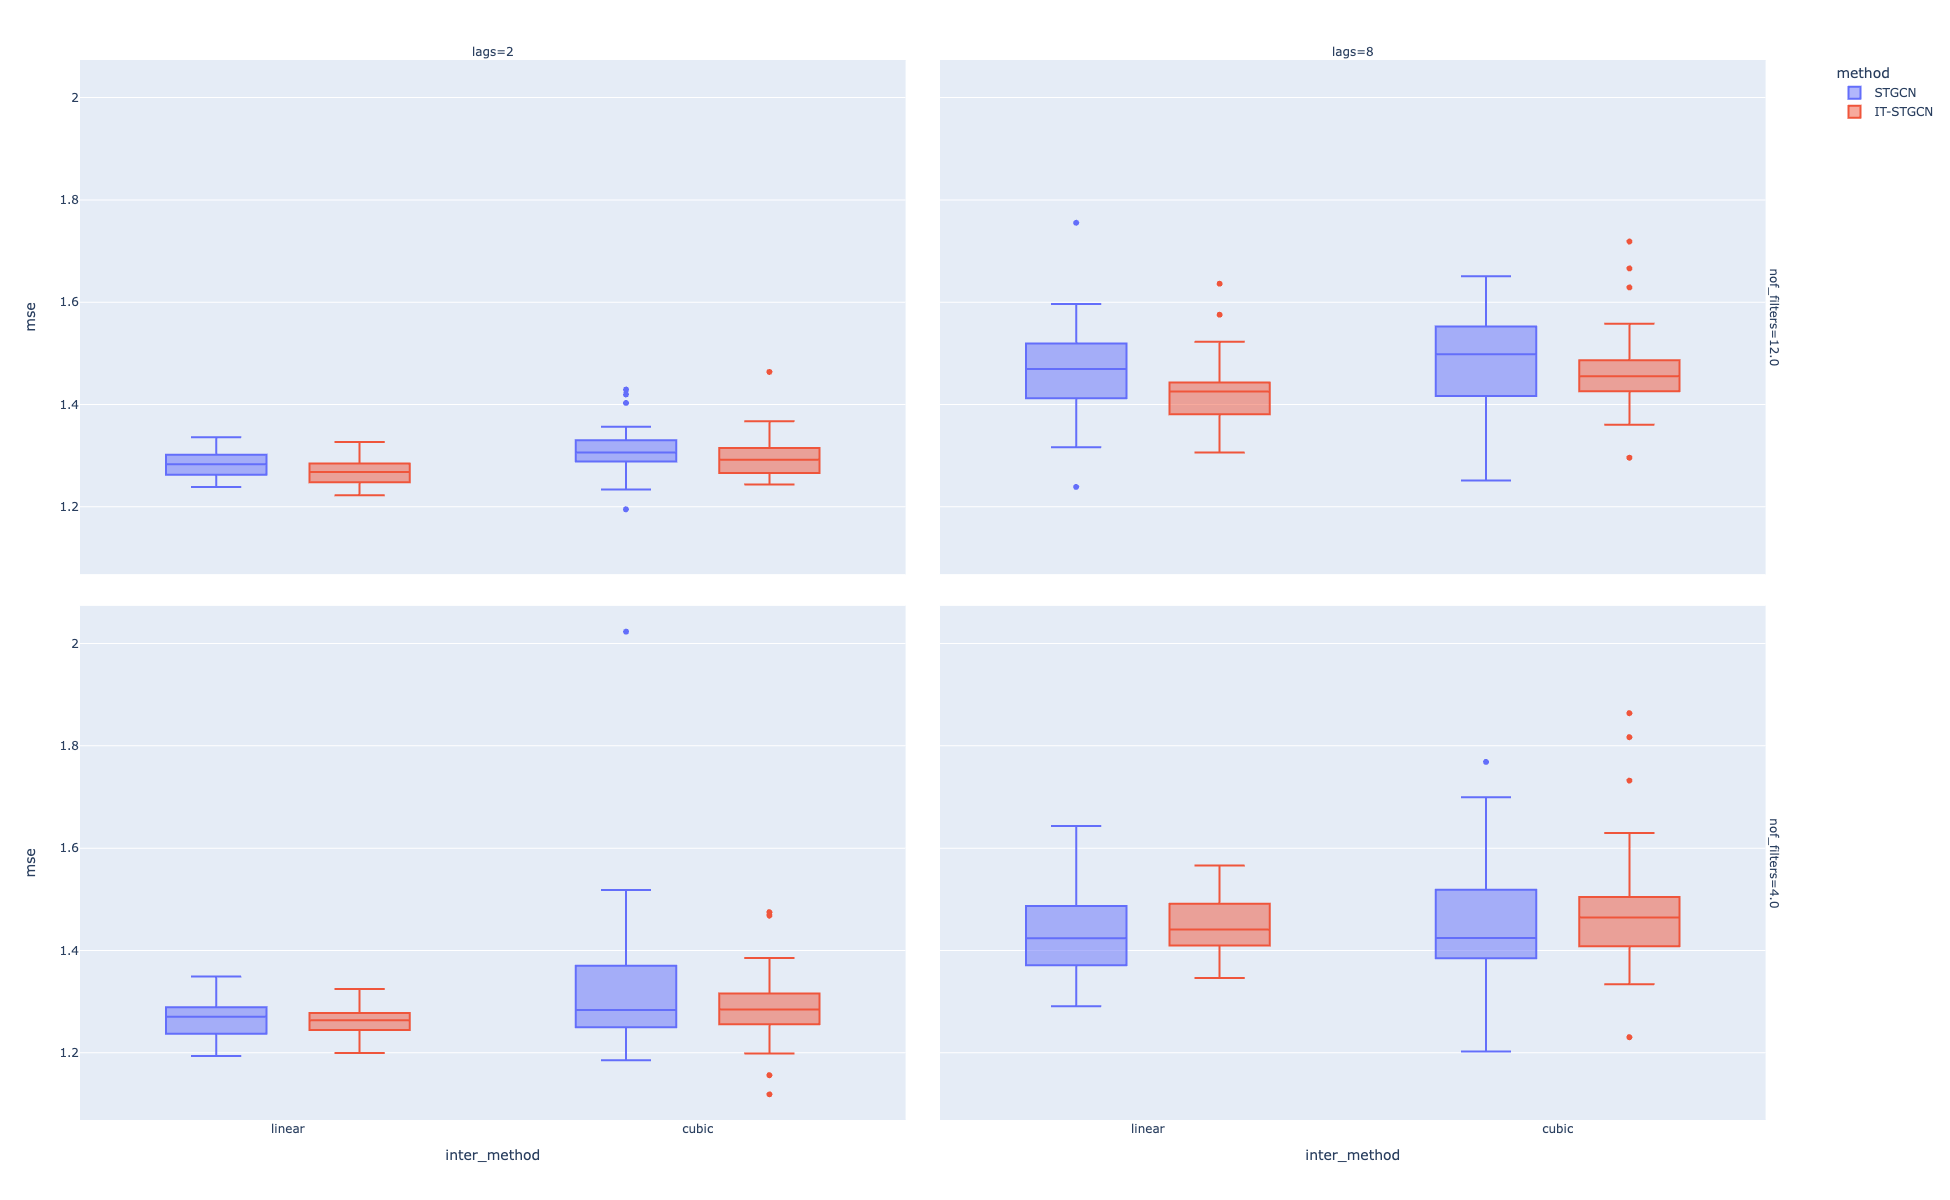

In [26]:
data.query("mtype=='rand' and method!='GNAR' and mrate==0.7").plot.box(backend='plotly',x='inter_method',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


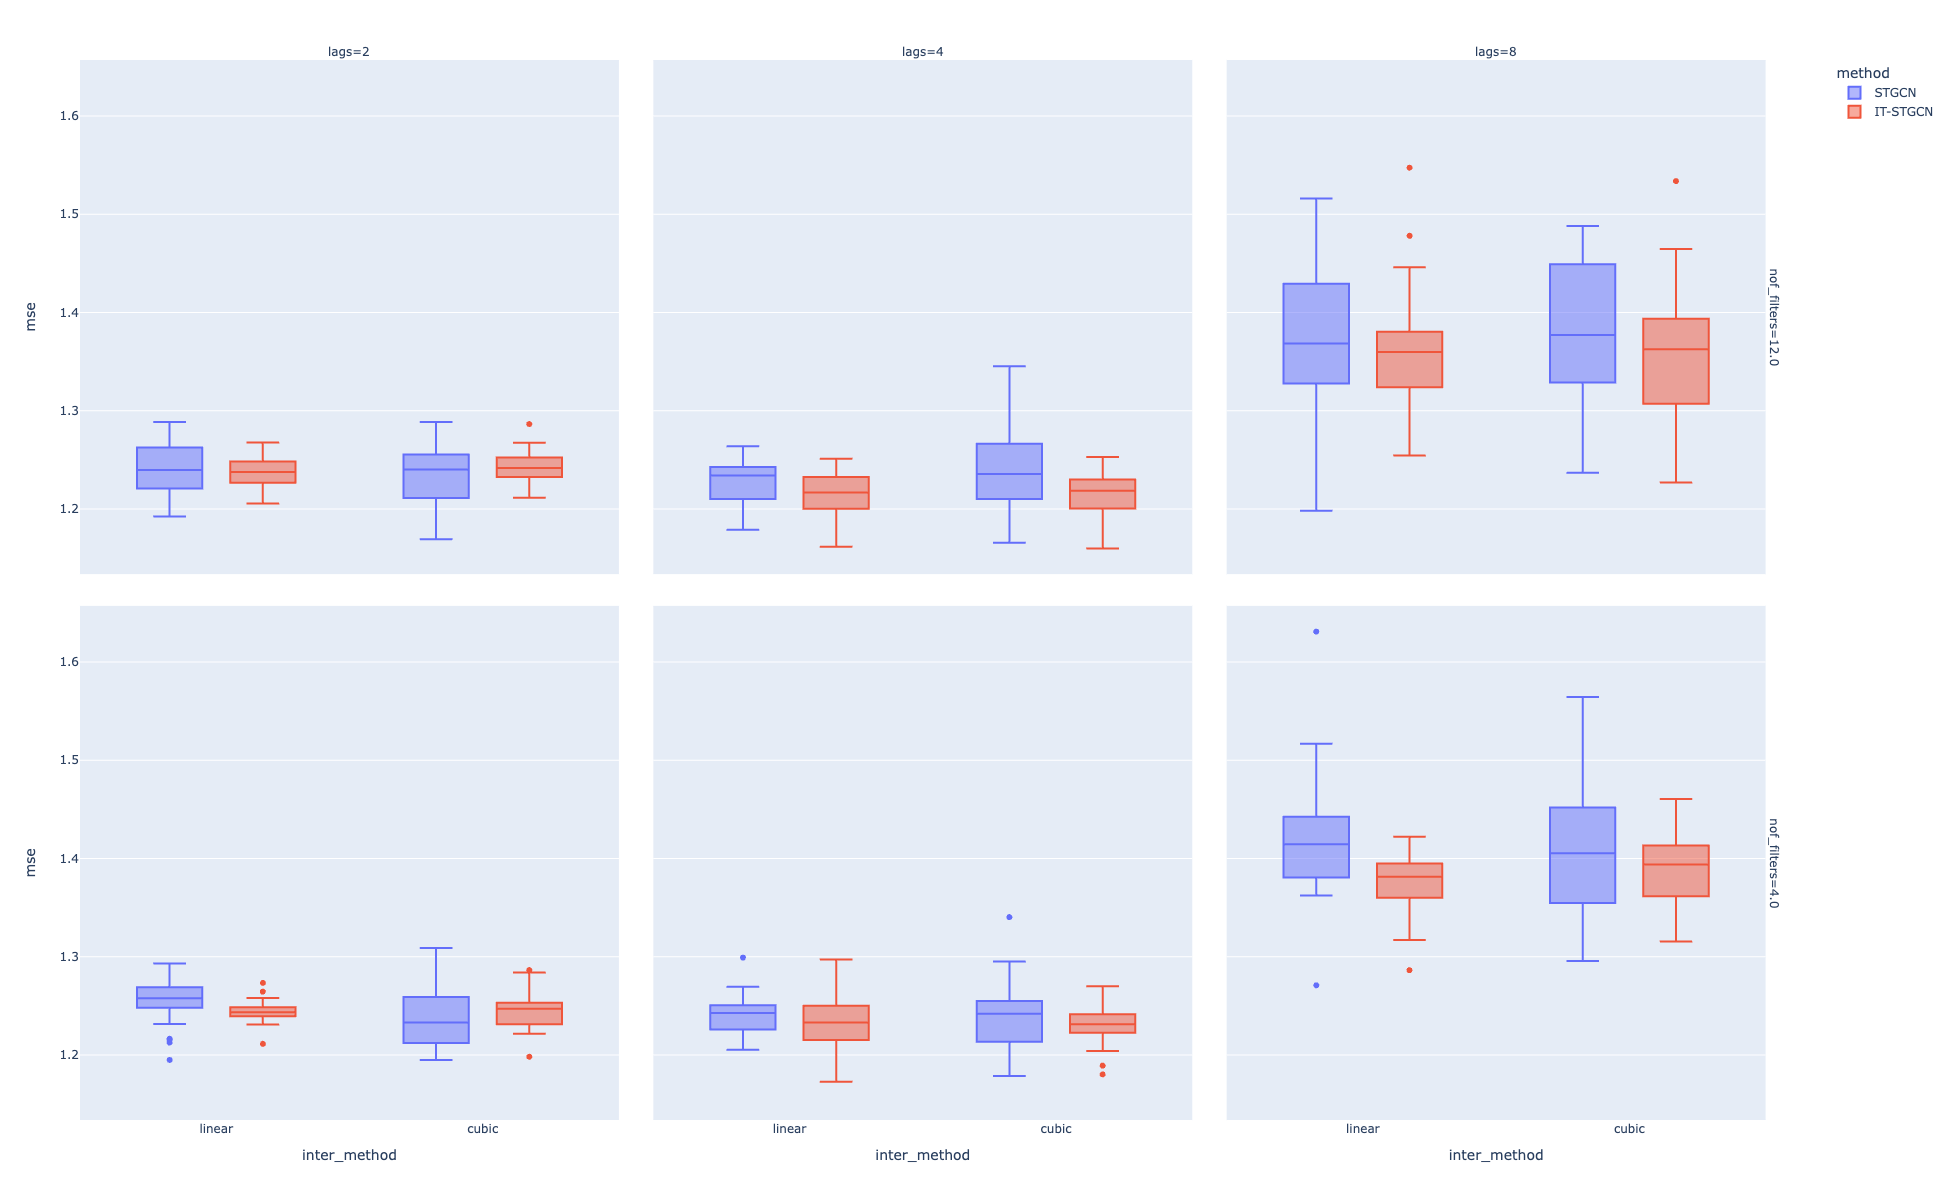

In [413]:
data.query("mtype=='rand' and method!='GNAR' and mrate==0.3").plot.box(backend='plotly',x='inter_method',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


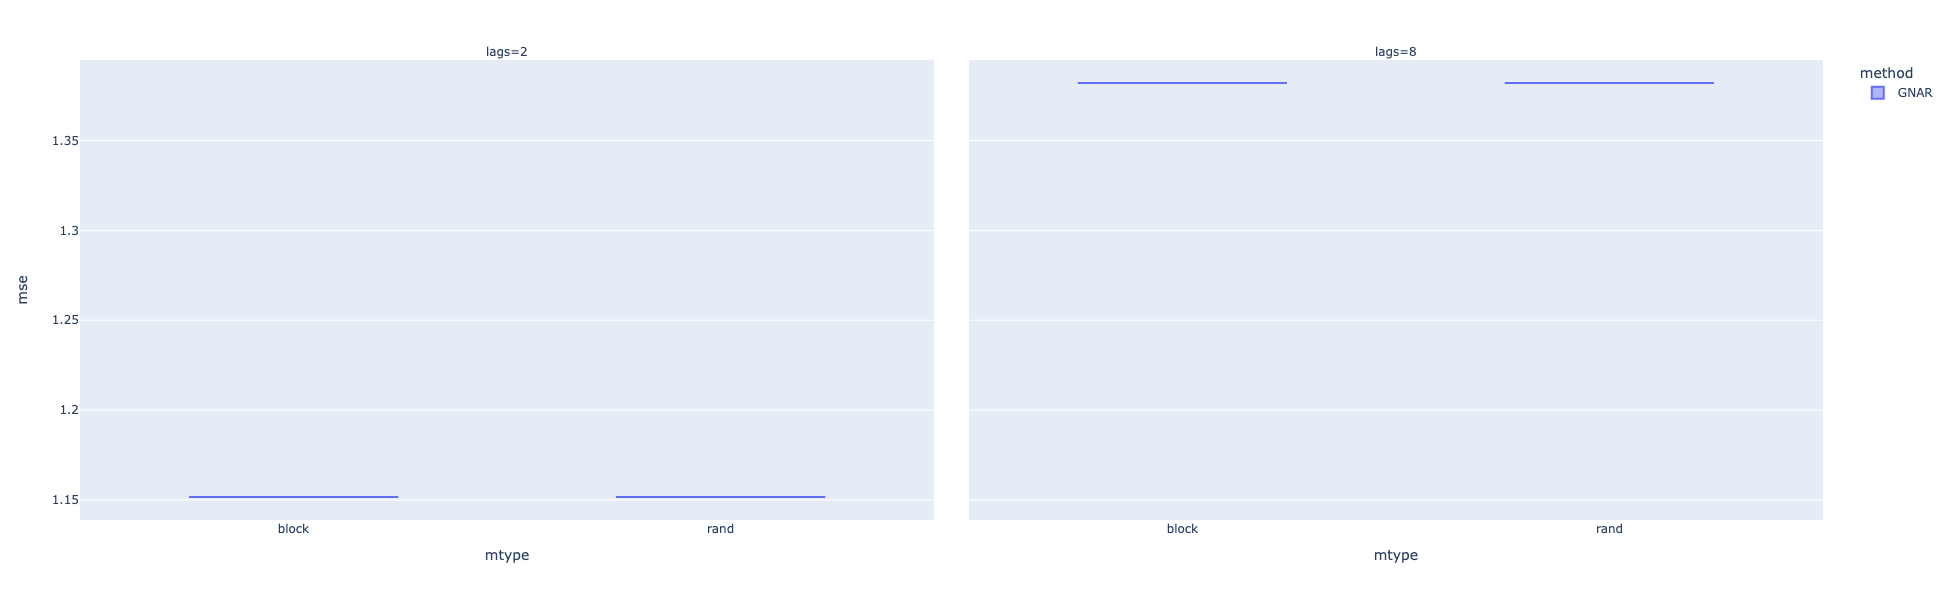

In [165]:
data.query("method=='GNAR'").plot.box(backend='plotly',x='mtype',color='method',y='mse',facet_col='lags',height=600)


#### 시뮬 예정(평균 시간, 평균mse)

lags 4,8

mrate 0.3~0.6



In [323]:
# 1. mrate = 0.3, filter = 4, epoch = 50, lags = 4
data.query("method !='GNAR' and mrate==0.3 and inter_method=='cubic' and nof_filters==12 and lags==8")['calculation_time'].mean(),data.query("method !='GNAR' and mrate==0.3 and inter_method=='cubic' and nof_filters==12 and lags==8")['mse'].mean()

(0.8366350531578064, 1.3687758445739746)

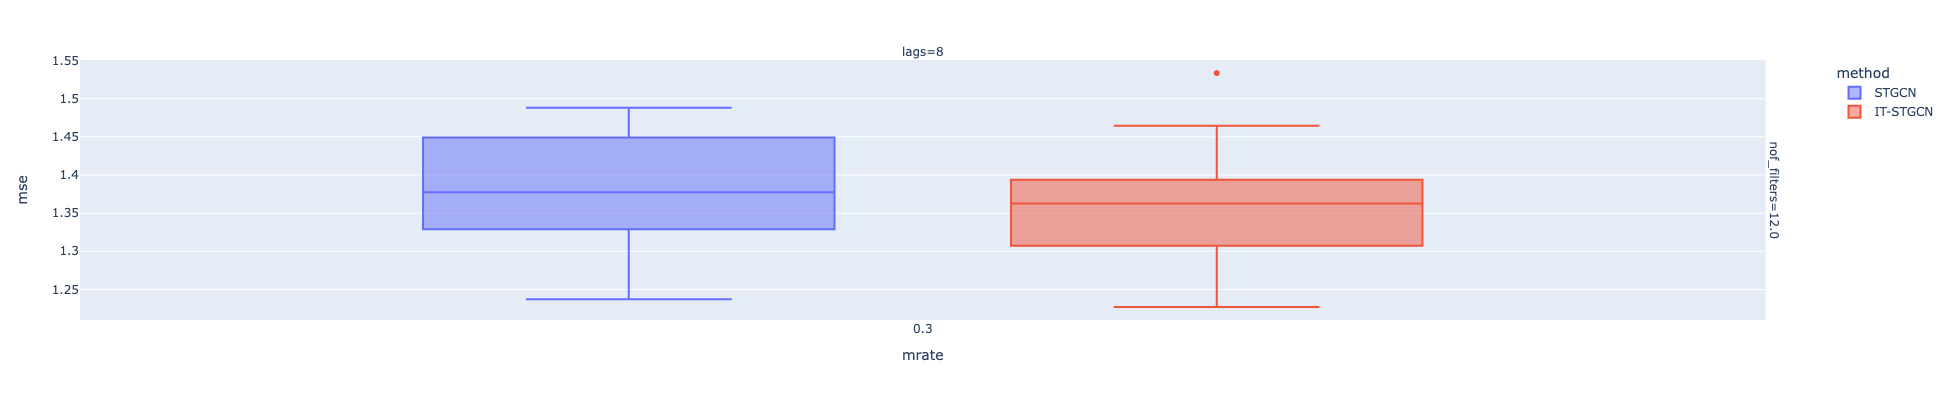

In [324]:
data.query("method !='GNAR' and mrate==0.3 and inter_method=='cubic' and nof_filters==12 and lags==8").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=400)

## block

In [487]:
data = pd.read_csv('./simulation_results/pedalme_block.csv');data

dataset    method     mrate  mtype  lags  nof_filters inter_method  \
0    pedalme  IT-STGCN  0.047619  block     2          4.0        cubic   
1    pedalme     STGCN  0.047619  block     2         12.0       linear   
2    pedalme     STGCN  0.047619  block     2         12.0        cubic   
3    pedalme     STGCN  0.047619  block     2          4.0       linear   
4    pedalme     STGCN  0.047619  block     2          4.0        cubic   
..       ...       ...       ...    ...   ...          ...          ...   
715  pedalme  IT-STGCN  0.045977  block     8          4.0        cubic   
716  pedalme     STGCN  0.045977  block     8         12.0        cubic   
717  pedalme     STGCN  0.045977  block     8         12.0       linear   
718  pedalme  IT-STGCN  0.045977  block     8         12.0       linear   
719  pedalme  IT-STGCN  0.045977  block     8         12.0        cubic   

     epoch       mse  calculation_time  
0      5.0  1.229210          0.758090  
1      5.0  1.223644          0.681700  
2      5.0  1.237086          0.684113  
3      5.0  1.225114          0.659210  
4      5.0  1.216191          0.664208  
..     ...       ...               ...  
715    5.0  1.425474          0.640063  
716    5.0  1.302402          0.718187  
717    5.0  1.336038          0.719500  
718    5.0  1.311962          0.831888  
719    5.0  1.315647          0.667004  

[720 rows x 10 columns]

missing rate 조정하기 30~50% 여러개 block 해서 

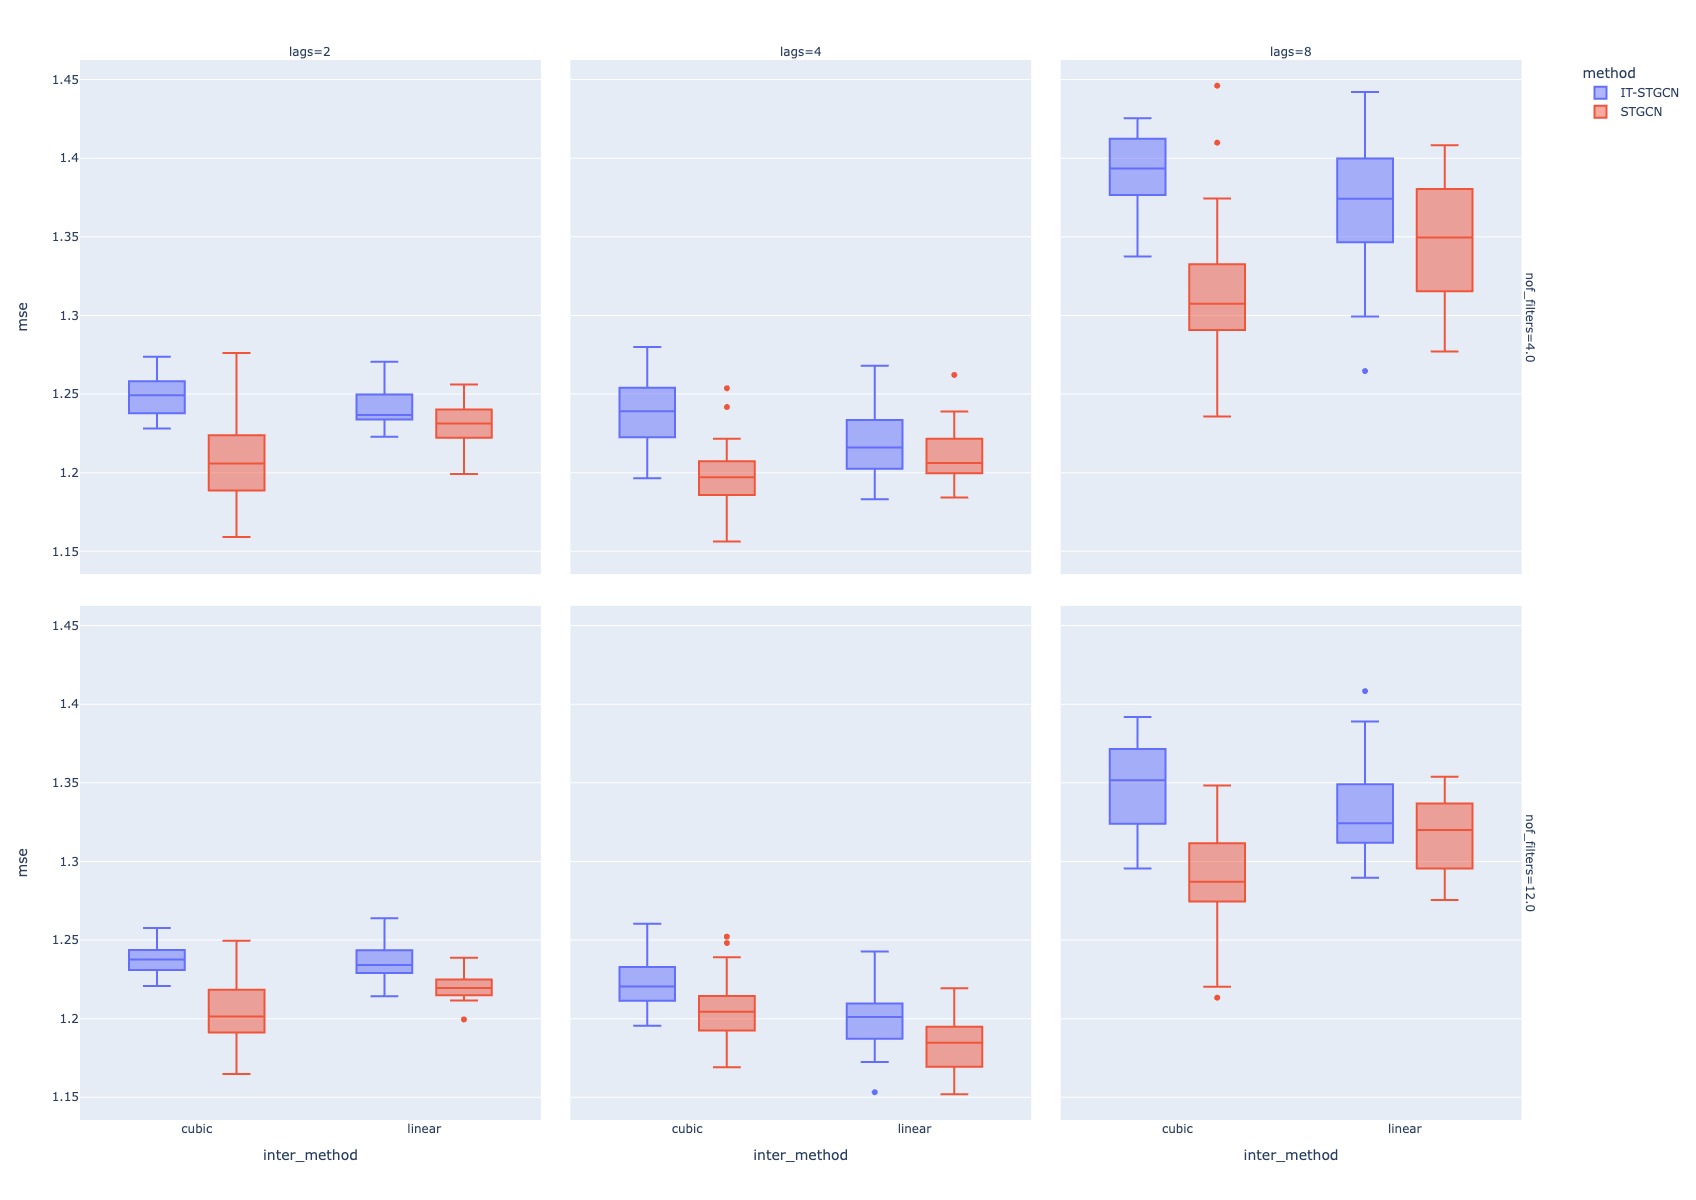

In [491]:
data.query("method!='GNAR'").plot.box(backend='plotly',x='inter_method',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


#### 시뮬 예정(평균 시간, 평균mse)

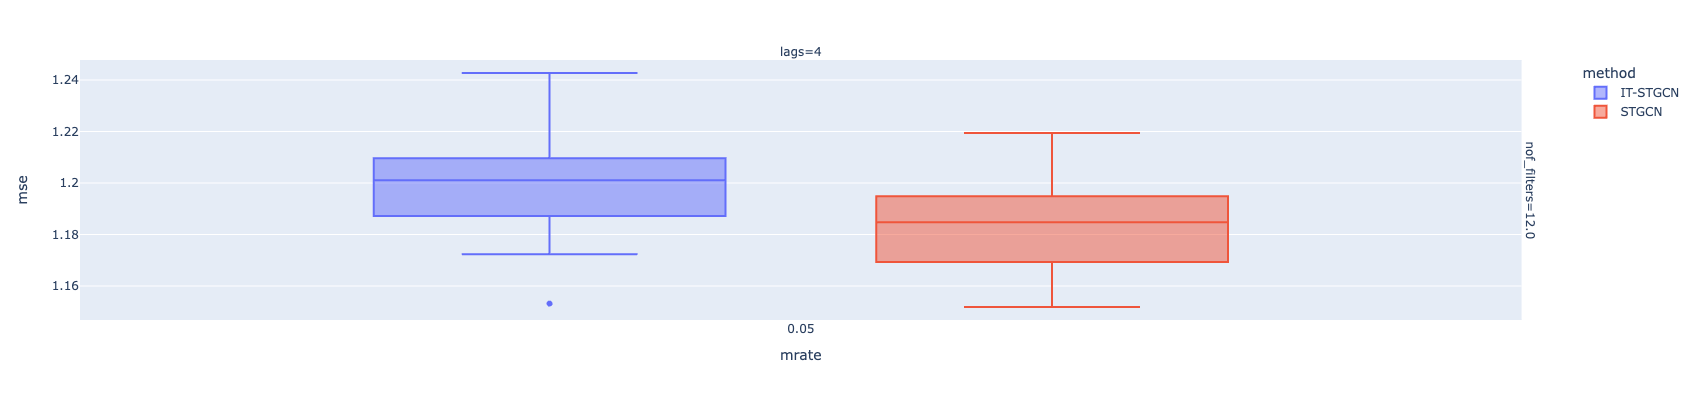

In [495]:
data.query("inter_method=='linear' and nof_filters==12 and lags==4").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=400)

# pedalme simulation result

block1
```python
my_list = [[] for _ in range(15)] #pedalme
another_list = list(range(5,25))
my_list[1] = another_list
my_list[3] = another_list
my_list[5] = another_list
my_list[7] = another_list
my_list[9] = another_list
my_list[11] = another_list
mindex = my_list
```
block 30% missing을 위한 조건

block2
```python
my_list = [[] for _ in range(15)] #pedalme
another_list = list(range(10,25))
my_list[2] = another_list
my_list[4] = another_list
my_list[5] = another_list
my_list[11] = another_list
mindex = my_list
```
block 30% missing을 위한 조건

In [162]:
df1 = pd.read_csv('./simulation_results/2023-04-13_20-37-59.csv') # STGCN, ITSTGCN random 0%,30%, 40%
df2 = pd.read_csv('./simulation_results/2023-04-13_21-29-38.csv') # STGCN, ITSTGCN random 50%, 60%
df3 = pd.read_csv('./simulation_results/2023-04-15_01-08-16.csv') # GNAR random 30%, 40%, 50%, 60%
df4 = pd.read_csv('./simulation_results/2023-04-13_21-56-36.csv') # GNAR block 30%
df5 = pd.read_csv('./simulation_results/2023-04-15_01-08-16.csv') # STGCN, ITSTGCN block 1 
df6 = pd.read_csv('./simulation_results/2023-04-15_01-38-46.csv') # STGCN, ITSTGCN block 2
# df7 = pd.read_csv('./simulation_results/2023-04-11_04-40-00.csv') # STGCN, ITSTGCN block linear

In [163]:
data = pd.concat([df1,df2,df3,df4,df5,df6],axis=0);data

dataset    method     mrate  mtype  lags  nof_filters inter_method  \
0    pedalme     STGCN  0.300000   rand     4         12.0        cubic   
1    pedalme     STGCN  0.300000   rand     4         12.0       linear   
2    pedalme     STGCN  0.300000   rand     8         12.0        cubic   
3    pedalme     STGCN  0.300000   rand     8         12.0       linear   
4    pedalme     STGCN  0.000000    NaN     4         12.0          NaN   
..       ...       ...       ...    ...   ...          ...          ...   
115  pedalme  IT-STGCN  0.137931  block     8         12.0        cubic   
116  pedalme     STGCN  0.142857  block     4         12.0        cubic   
117  pedalme     STGCN  0.137931  block     8         12.0        cubic   
118  pedalme  IT-STGCN  0.142857  block     4         12.0        cubic   
119  pedalme  IT-STGCN  0.137931  block     8         12.0        cubic   

     epoch       mse  calculation_time  
0     50.0  1.105710          6.291031  
1     50.0  1.589615          6.157079  
2     50.0  1.750380          5.378390  
3     50.0  1.359417          5.414476  
4     50.0  1.247342          6.153305  
..     ...       ...               ...  
115   50.0  1.272855          6.657242  
116   50.0  1.165904          6.297507  
117   50.0  1.285807          5.538206  
118   50.0  1.270656          7.295285  
119   50.0  1.463783          6.675699  

[1692 rows x 10 columns]

In [164]:
data.to_csv('./simulation_results/Real_simulation/pedalme_Simulation.csv',index=False)

In [165]:
data = pd.read_csv('./simulation_results/Real_simulation/pedalme_Simulation.csv')

In [166]:
data.query("method=='GNAR' and mtype == 'rand'")['mse'].mean(),data.query("method=='GNAR' and mtype != 'rand'")['mse'].mean()

(1.3026788234710691, 1.34235417842865)

In [167]:
data.query("method=='STGCN' and mtype == 'rand'")['mse'].mean(),data.query("method=='STGCN' and mtype != 'rand'")['mse'].mean()

(1.415487505743901, 1.3578179611100092)

In [168]:
data.query("method=='IT-STGCN' and mtype == 'rand'")['mse'].mean(),data.query("method=='IT-STGCN' and mtype != 'rand'")['mse'].mean()

(1.4283250387758017, 1.336261150572035)

Baseline

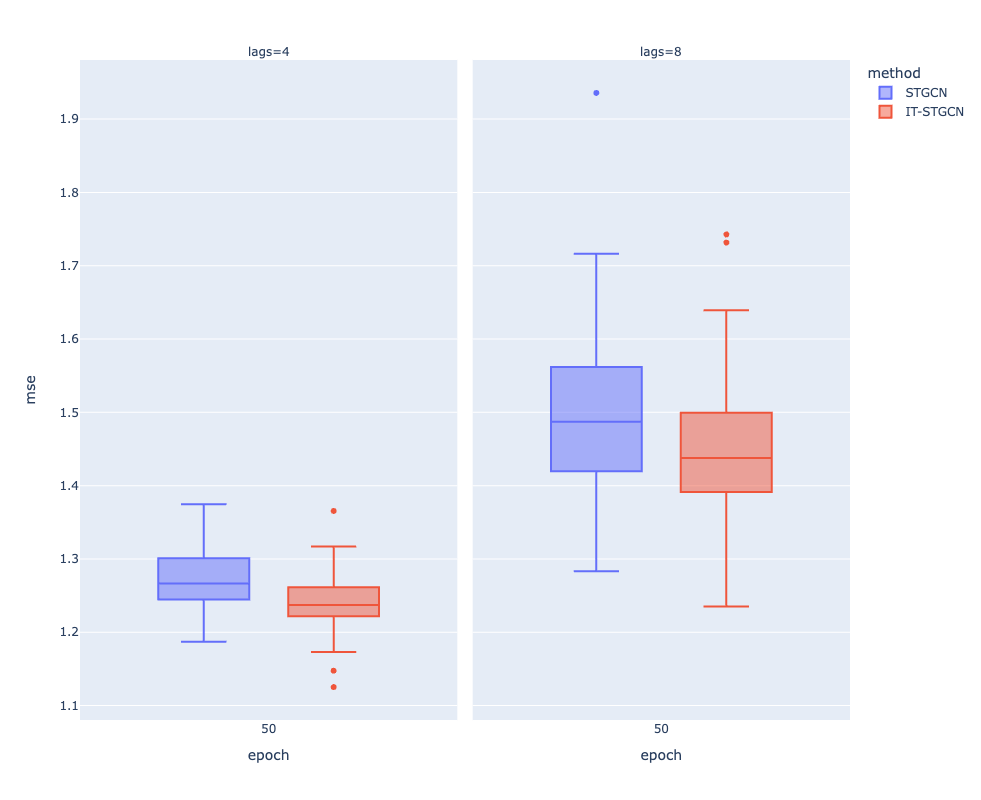

In [169]:
data.query("method!='GNAR' and mrate ==0 ").plot.box(backend='plotly',x='epoch',color='method',y='mse',facet_col='lags',height=800)


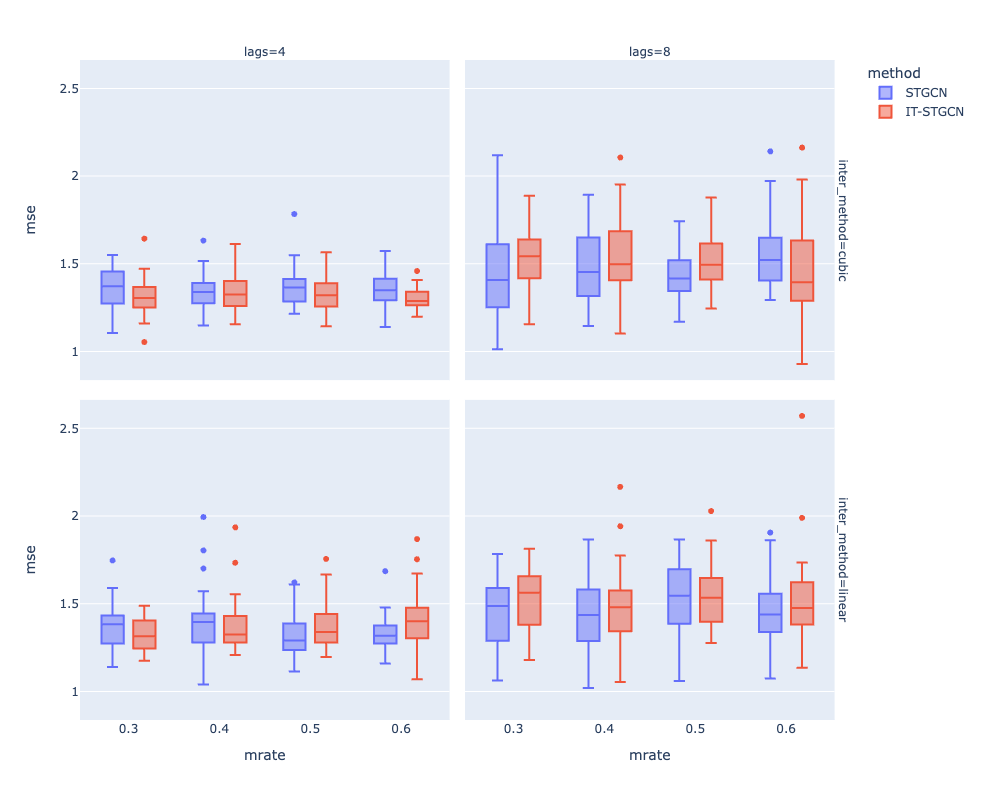

In [170]:
data.query("method!='GNAR' and mtype =='rand' ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='inter_method',height=800)


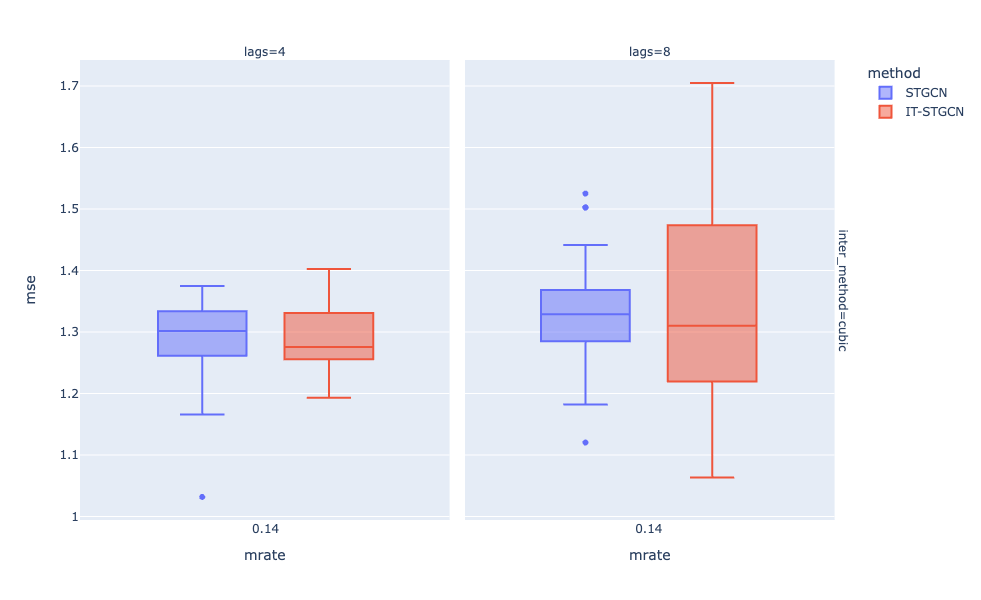

In [172]:
data.query("method!='GNAR' and mtype =='block' ").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='inter_method',height=600)


# Wikimath

- 공식 패키지: lags 8 지정
- 오히려 cuboic 보다 linear가 더 잘 맞추는 경향
- mrate = 0.3
    - 크면 이상치 심하게 나와서 작게 잡기
- nof_filters = 12, 16
    - 필터 크니까 mse 내려감
- lags = 2,
- cal_time
    - mean = 71s
    - max = 212s

## random

In [286]:
df1 = pd.read_csv('./simulation_results/2023-04-15_16-58-03.csv')
df2 = pd.read_csv('./simulation_results/2023-04-15_17-01-39.csv')
df3 = pd.read_csv('./simulation_results/2023-04-15_17-07-23.csv')
df4 = pd.read_csv('./simulation_results/2023-04-15_17-13-13.csv')
df5 = pd.read_csv('./simulation_results/2023-04-15_17-29-49.csv')

In [289]:
data = pd.concat([df1,df2,df3,df4,df5],axis=0)

In [290]:
data.query("method=='STGCN'").sort_values(['mrate','lags','nof_filters'])

dataset method  mrate mtype  lags  nof_filters inter_method  epoch  \
0  wikimath  STGCN    0.3  rand     4           12       linear      1   
0  wikimath  STGCN    0.3  rand     4           12        cubic      1   
0  wikimath  STGCN    0.4  rand     2           12       linear      1   
1  wikimath  STGCN    0.4  rand     2           12        cubic      1   
0  wikimath  STGCN    0.4  rand     4           12       linear      1   
1  wikimath  STGCN    0.4  rand     4           12        cubic      1   
2  wikimath  STGCN    0.4  rand     8           12       linear      1   
3  wikimath  STGCN    0.4  rand     8           12        cubic      1   
0  wikimath  STGCN    0.5  rand     4           12       linear      1   
1  wikimath  STGCN    0.5  rand     4           12        cubic      1   

        mse  calculation_time  
0  0.863623         25.504817  
0  0.847675         27.086116  
0  0.912734         30.048937  
1  0.916843         27.104823  
0  0.907305         24.776503  
1  0.854127         24.608104  
2  0.788011         24.233431  
3  0.795219         24.228026  
0  0.914080         26.301605  
1  0.975948         27.855870

In [291]:
data.query("method!='STGCN'").sort_values(['mrate','lags','nof_filters'])

dataset    method  mrate mtype  lags  nof_filters inter_method  epoch  \
1  wikimath  IT-STGCN    0.3  rand     4           12       linear      1   
1  wikimath  IT-STGCN    0.3  rand     4           12        cubic      1   
4  wikimath  IT-STGCN    0.4  rand     2           12       linear      1   
5  wikimath  IT-STGCN    0.4  rand     2           12        cubic      1   
2  wikimath  IT-STGCN    0.4  rand     4           12       linear      1   
3  wikimath  IT-STGCN    0.4  rand     4           12        cubic      1   
6  wikimath  IT-STGCN    0.4  rand     8           12       linear      1   
7  wikimath  IT-STGCN    0.4  rand     8           12        cubic      1   
2  wikimath  IT-STGCN    0.5  rand     4           12       linear      1   
3  wikimath  IT-STGCN    0.5  rand     4           12        cubic      1   

        mse  calculation_time  
1  0.908916         28.928112  
1  0.856639         29.759748  
4  0.864580         29.660712  
5  0.926426         30.838968  
2  0.871146         29.008776  
3  0.905354         30.405766  
6  0.822462         32.329447  
7  0.817621         29.447260  
2  0.878943         31.140878  
3  1.002361         28.461372

In [283]:
plans_stgcn_rand = {
    'max_iteration': 1, 
    'method': ['STGCN', 'IT-STGCN'], 
    'mrate': [0.4],
    'lags': [2,8], 
    'nof_filters': [12], 
    'inter_method': ['linear','cubic'],
    'epoch': [1]
}

In [284]:
plnr = itstgcn.planner.PLNR_STGCN_RAND(plans_stgcn_rand,loader3,dataset_name='wikimath')

In [285]:
plnr.simulate()

1/1 is done
All results are stored in ./simulation_results/2023-04-15_17-29-49.csv


In [ ]:
data.query("method!='GNAR'")['calculation_time'].mean(),data.query("method!='GNAR'")['calculation_time'].max(),data.query("method!='GNAR'")['calculation_time'].min()

In [ ]:
data.query("mtype=='rand' and mrate != 0.9 and method!='GNAR' and inter_method=='cubic'").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


In [ ]:
data.query("mtype=='rand' and method!='GNAR' and inter_method=='linear'").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


#### 시뮬 예정(평균 시간, 평균mse)

In [ ]:
data.query("method !='GNAR' and mrate==0.3 and inter_method=='cubic' and nof_filters==12 and lags==8")['calculation_time'].mean(),data.query("method !='GNAR' and mrate==0.3 and inter_method=='cubic' and nof_filters==12 and lags==8")['mse'].mean()

In [ ]:
data.query("method !='GNAR' and mrate==0.3 and inter_method=='linear' and nof_filters==12 and lags==8")['calculation_time'].mean(),data.query("method !='GNAR' and mrate==0.3 and inter_method=='linear' and nof_filters==12 and lags==8")['mse'].mean()

In [ ]:
data.query("method !='GNAR' and mrate==0.3 and nof_filters==12 and lags==8").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=400)

## block

In [ ]:
data = pd.read_csv('./simulation_results/wiki_block.csv');data

In [ ]:
data.query("method!='GNAR'")['calculation_time'].mean(),data.query("method!='GNAR'")['calculation_time'].max(),data.query("method!='GNAR'")['calculation_time'].min()

In [ ]:
data.query("method!='GNAR' and inter_method=='cubic'").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


In [ ]:
data.query("inter_method=='linear'").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=1200)


#### 시뮬 예정(평균 시간, 평균mse)

In [ ]:
data.query("inter_method=='linear' and nof_filters==12 and lags==8")['calculation_time'].mean(),data.query("inter_method=='linear' and nof_filters==12 and lags==8")['mse'].mean()

In [ ]:
data.query("inter_method=='linear' and nof_filters==12 and lags==8").plot.box(backend='plotly',x='mrate',color='method',y='mse',facet_col='lags',facet_row='nof_filters',height=400)

# Windmilmedium

In [229]:
df1 = pd.read_csv('./simulation_results/2023-04-15_09-06-12.csv') # GNAR
df2 = pd.read_csv('./simulation_results/2023-04-15_09-19-44.csv') # STGCN IT-STGCN
df3 = pd.read_csv('./simulation_results/2023-04-15_09-28-32.csv') # STGCN IT-STGCN
df4 = pd.read_csv('./simulation_results/2023-04-15_09-36-55.csv') # STGCN IT-STGCN
df5 = pd.read_csv('./simulation_results/2023-04-15_09-54-30.csv') # STGCN IT-STGCN
df6 = pd.read_csv('./simulation_results/2023-04-15_10-03-08.csv') # STGCN IT-STGCN
df7 = pd.read_csv('./simulation_results/2023-04-15_10-15-48.csv') # STGCN IT-STGCN
df8 = pd.read_csv('./simulation_results/2023-04-15_10-25-19.csv') # STGCN IT-STGCN
df9 = pd.read_csv('./simulation_results/2023-04-15_10-34-48.csv') # STGCN IT-STGCN
df10 = pd.read_csv('./simulation_results/2023-04-15_10-43-02.csv') # STGCN IT-STGCN

In [230]:
data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10],axis=0)

In [231]:
data.query("method=='GNAR'")

dataset method  mrate mtype  lags  nof_filters inter_method  epoch  \
0  windmilmedium   GNAR    0.1  rand     4          NaN        cubic    NaN   
1  windmilmedium   GNAR    0.1  rand     4          NaN        cubic    NaN   
2  windmilmedium   GNAR    0.1  rand     4          NaN        cubic    NaN   

        mse  calculation_time  
0  1.410524          3.150951  
1  1.410524          2.926645  
2  1.410524          2.406094

In [232]:
data.query("method!='GNAR' and method=='STGCN'").sort_values(['mrate','nof_filters'])

dataset method  mrate mtype  lags  nof_filters inter_method  epoch  \
0  windmilmedium  STGCN    0.1  rand     2         12.0        cubic    1.0   
0  windmilmedium  STGCN    0.4  rand     2         12.0        cubic    1.0   
0  windmilmedium  STGCN    0.5  rand     4         12.0        cubic    1.0   
0  windmilmedium  STGCN    0.8  rand     2          4.0       linear    1.0   
0  windmilmedium  STGCN    0.8  rand     2          8.0       linear    1.0   
0  windmilmedium  STGCN    0.8  rand     2         12.0        cubic    1.0   
0  windmilmedium  STGCN    0.8  rand     2         12.0       linear    1.0   
0  windmilmedium  STGCN    0.8  rand     2         16.0       linear    1.0   
0  windmilmedium  STGCN    0.8  rand     2         32.0       linear    1.0   

        mse  calculation_time  
0  1.038629         85.205226  
0  1.325845         85.721810  
0  1.568322         87.435629  
0  1.256851         79.950040  
0  1.259840         83.667886  
0  1.874045         85.171979  
0  1.427910         84.167046  
0  1.449077         93.408642  
0  1.339085         88.795324

In [250]:
(6*30*50*2)/24

750.0

In [233]:
data.query("method!='GNAR' and method!='STGCN'").sort_values(['mrate','nof_filters'])

dataset    method  mrate mtype  lags  nof_filters inter_method  \
1  windmilmedium  IT-STGCN    0.1  rand     2         12.0        cubic   
1  windmilmedium  IT-STGCN    0.4  rand     2         12.0        cubic   
1  windmilmedium  IT-STGCN    0.5  rand     4         12.0        cubic   
1  windmilmedium  IT-STGCN    0.8  rand     2          4.0       linear   
1  windmilmedium  IT-STGCN    0.8  rand     2          8.0       linear   
1  windmilmedium  IT-STGCN    0.8  rand     2         12.0        cubic   
1  windmilmedium  IT-STGCN    0.8  rand     2         12.0       linear   
1  windmilmedium  IT-STGCN    0.8  rand     2         16.0       linear   
1  windmilmedium  IT-STGCN    0.8  rand     2         32.0       linear   

   epoch       mse  calculation_time  
1    1.0  0.991687        282.159899  
1    1.0  1.150386        282.688800  
1    1.0  1.232030        273.543777  
1    1.0  1.217331        295.937213  
1    1.0  1.162310        259.498000  
1    1.0  1.772746        262.409024  
1    1.0  1.182181        287.886245  
1    1.0  1.430025        306.211073  
1    1.0  1.203084        309.623751

linear, 0.7~0.9, 4,8, 

In [ ]:
data.to_csv('./simulation_results/Real_simulation/windmilmedium_Simulation.csv',index=False)

In [ ]:
data.query("method!='GNAR'")['calculation_time'].mean(),data.query("method!='GNAR'")['calculation_time'].max(),data.query("method!='GNAR'")['calculation_time'].min()

## random

## block

# Windmilsmall

In [240]:
df1 = pd.read_csv('./simulation_results/2023-04-15_10-59-28.csv') # GNAR
df2 = pd.read_csv('./simulation_results/2023-04-15_11-15-05.csv') # STGCN IT-STGCN
df3 = pd.read_csv('./simulation_results/2023-04-15_11-30-48.csv') # STGCN IT-STGCN
df4 = pd.read_csv('./simulation_results/2023-04-15_11-46-45.csv') # STGCN IT-STGCN
df5 = pd.read_csv('./simulation_results/2023-04-15_12-02-19.csv') # STGCN IT-STGCN
df6 = pd.read_csv('./simulation_results/2023-04-15_15-00-32.csv') # STGCN IT-STGCN
# df7 = pd.read_csv('./simulation_results/2023-04-15_10-15-48.csv') # STGCN IT-STGCN
# df8 = pd.read_csv('./simulation_results/2023-04-15_10-25-19.csv') # STGCN IT-STGCN
# df9 = pd.read_csv('./simulation_results/2023-04-15_10-34-48.csv') # STGCN IT-STGCN
# df10 = pd.read_csv('./simulation_results/2023-04-15_10-43-02.csv') # STGCN IT-STGCN

In [241]:
data = pd.concat([df1,df2,df3,df4,df5,df6],axis=0)

In [245]:
data.query("method=='GNAR'").sort_values(['mrate','nof_filters'])

dataset method  mrate mtype  lags  nof_filters inter_method  epoch  \
0   windmilsmall   GNAR    0.3  rand     4          NaN        cubic    NaN   
1   windmilsmall   GNAR    0.3  rand     4          NaN       linear    NaN   
6   windmilsmall   GNAR    0.3  rand     4          NaN        cubic    NaN   
7   windmilsmall   GNAR    0.3  rand     4          NaN       linear    NaN   
12  windmilsmall   GNAR    0.3  rand     4          NaN        cubic    NaN   
13  windmilsmall   GNAR    0.3  rand     4          NaN       linear    NaN   
2   windmilsmall   GNAR    0.5  rand     4          NaN        cubic    NaN   
3   windmilsmall   GNAR    0.5  rand     4          NaN       linear    NaN   
8   windmilsmall   GNAR    0.5  rand     4          NaN        cubic    NaN   
9   windmilsmall   GNAR    0.5  rand     4          NaN       linear    NaN   
14  windmilsmall   GNAR    0.5  rand     4          NaN        cubic    NaN   
15  windmilsmall   GNAR    0.5  rand     4          NaN       linear    NaN   
4   windmilsmall   GNAR    0.7  rand     4          NaN        cubic    NaN   
5   windmilsmall   GNAR    0.7  rand     4          NaN       linear    NaN   
10  windmilsmall   GNAR    0.7  rand     4          NaN        cubic    NaN   
11  windmilsmall   GNAR    0.7  rand     4          NaN       linear    NaN   
16  windmilsmall   GNAR    0.7  rand     4          NaN        cubic    NaN   
17  windmilsmall   GNAR    0.7  rand     4          NaN       linear    NaN   

         mse  calculation_time  
0   1.640339          1.222944  
1   1.640339          0.954795  
6   1.640339          0.761808  
7   1.640339          0.790776  
12  1.640339          0.987039  
13  1.640339          0.976644  
2   1.640339          0.901695  
3   1.640339          0.939233  
8   1.640339          0.986533  
9   1.640339          0.988925  
14  1.640339          0.692504  
15  1.640339          0.954345  
4   1.640339          0.938546  
5   1.640339          0.926433  
10  1.640339          0.830638  
11  1.640339          0.947263  
16  1.640339          0.939917  
17  1.640339          0.950329

In [243]:
data.query("method!='GNAR' and method=='STGCN'").sort_values(['mrate','nof_filters'])

dataset method  mrate mtype  lags  nof_filters inter_method  epoch  \
0  windmilsmall  STGCN    0.3  rand     4         12.0       linear    1.0   
1  windmilsmall  STGCN    0.3  rand     4         12.0        cubic    1.0   
0  windmilsmall  STGCN    0.5  rand     4         12.0       linear    1.0   
1  windmilsmall  STGCN    0.5  rand     4         12.0        cubic    1.0   
0  windmilsmall  STGCN    0.5  rand     8         12.0       linear    1.0   
1  windmilsmall  STGCN    0.5  rand     8         12.0        cubic    1.0   
0  windmilsmall  STGCN    0.5  rand     4         32.0       linear    1.0   
1  windmilsmall  STGCN    0.5  rand     4         32.0        cubic    1.0   
0  windmilsmall  STGCN    0.7  rand     4         12.0       linear    1.0   
1  windmilsmall  STGCN    0.7  rand     4         12.0        cubic    1.0   

        mse  calculation_time  
0  1.200871         73.057425  
1  1.442769         82.757819  
0  1.332673         73.738043  
1  1.935493         75.276489  
0  1.287041         72.605574  
1  1.954025         72.804517  
0  1.320776         74.728671  
1  1.865486         75.110273  
0  1.470515         74.648811  
1  2.182147         71.730788

In [244]:
data.query("method!='GNAR' and method!='STGCN'").sort_values(['mrate','nof_filters'])

dataset    method  mrate mtype  lags  nof_filters inter_method  epoch  \
2  windmilsmall  IT-STGCN    0.3  rand     4         12.0       linear    1.0   
3  windmilsmall  IT-STGCN    0.3  rand     4         12.0        cubic    1.0   
2  windmilsmall  IT-STGCN    0.5  rand     4         12.0       linear    1.0   
3  windmilsmall  IT-STGCN    0.5  rand     4         12.0        cubic    1.0   
2  windmilsmall  IT-STGCN    0.5  rand     8         12.0       linear    1.0   
3  windmilsmall  IT-STGCN    0.5  rand     8         12.0        cubic    1.0   
2  windmilsmall  IT-STGCN    0.5  rand     4         32.0       linear    1.0   
3  windmilsmall  IT-STGCN    0.5  rand     4         32.0        cubic    1.0   
2  windmilsmall  IT-STGCN    0.7  rand     4         12.0       linear    1.0   
3  windmilsmall  IT-STGCN    0.7  rand     4         12.0        cubic    1.0   

        mse  calculation_time  
2  0.997696        255.592267  
3  1.049607        268.626712  
2  1.103726        253.085496  
3  1.459947        278.678849  
2  1.110951        266.898954  
3  1.314662        270.144128  
2  1.153238        259.596158  
3  1.341482        253.815536  
2  1.215104        283.833449  
3  2.141516        279.526782

linear, lags 4,8.  filter 8,12

## random

## block